# Pre processing data
Triangular Mesh - > SDF

In [1]:
import os
import glob
import numpy as np
import trimesh
from tqdm import tqdm

In [ ]:


# ------------------------ SETTINGS ------------------------
mesh_folder = "02_dataset/maize_mesh_0.01"
sdf_folder = "02_dataset//maize_sdf"
os.makedirs(sdf_folder, exist_ok=True)

padding = 0.1

num_samples = 5000
near_surface_ratio = 0.8
num_surface_points = int(num_samples * near_surface_ratio)
num_uniform_points = num_samples - num_surface_points

num_files_to_process = 1045   # number of meshes to process

# ------------------------ PROCESSING ------------------------
all_mesh_files = sorted(glob.glob(os.path.join(mesh_folder, "*.obj")))

# Take only required number of meshes
mesh_files = all_mesh_files[:num_files_to_process]

print(f"Processing {len(mesh_files)} meshes out of {len(all_mesh_files)} total meshes")

# ------------------------ LOOP ------------------------
for mesh_file in tqdm(mesh_files, desc="Extracting SDF"):
    print(f"\nProcessing: {os.path.basename(mesh_file)}")

    mesh = trimesh.load(mesh_file, process=False)

    # ---------------- Normalize mesh ----------------
    mesh.apply_translation(-mesh.centroid)
    scale_factor = 1.0 / np.max(mesh.extents)
    mesh.apply_scale(scale_factor)

    # ---------------- Sample surface points ----------------
    surface_points, _ = trimesh.sample.sample_surface(
        mesh, num_surface_points
    )
    surface_points += np.random.normal(
        scale=0.001, size=surface_points.shape
    )

    # ---------------- Sample uniform points ----------------
    bbox_min = mesh.bounds[0] - padding
    bbox_max = mesh.bounds[1] + padding

    uniform_points = np.random.uniform(
        low=bbox_min,
        high=bbox_max,
        size=(num_uniform_points, 3)
    )

    # ---------------- Combine points ----------------
    all_points = np.vstack([surface_points, uniform_points])

    # ---------------- Compute SDF ----------------
    _, distances, _ = mesh.nearest.on_surface(all_points)
    inside_mask = mesh.contains(all_points)

    sdf = distances
    sdf[inside_mask] *= -1

    # ---------------- Save ----------------
    save_name = os.path.join(
        sdf_folder,
        os.path.basename(mesh_file).replace(".obj", ".npz")
    )

    np.savez_compressed(
        save_name,
        points=all_points.astype(np.float32),
        sdf=sdf.astype(np.float32)
    )

print("\n✅ Finished processing selected meshes!")


Processing 1045 meshes out of 1045 total meshes


Extracting SDF:   0%|          | 0/1045 [00:00<?, ?it/s]


Processing: 0001.obj


Extracting SDF:   0%|          | 1/1045 [00:15<4:26:41, 15.33s/it]


Processing: 0002.obj


Extracting SDF:   0%|          | 2/1045 [00:21<2:54:10, 10.02s/it]


Processing: 0003.obj


Extracting SDF:   0%|          | 3/1045 [00:30<2:41:58,  9.33s/it]


Processing: 0004.obj


Extracting SDF:   0%|          | 4/1045 [00:45<3:21:32, 11.62s/it]


Processing: 0005.obj


Extracting SDF:   0%|          | 5/1045 [00:58<3:31:22, 12.19s/it]


Processing: 0006.obj


Extracting SDF:   1%|          | 6/1045 [01:05<3:00:06, 10.40s/it]


Processing: 0007.obj


Extracting SDF:   1%|          | 7/1045 [01:24<3:47:57, 13.18s/it]


Processing: 0008.obj


Extracting SDF:   1%|          | 8/1045 [01:37<3:46:27, 13.10s/it]


Processing: 0009.obj


Extracting SDF:   1%|          | 9/1045 [01:42<3:02:07, 10.55s/it]


Processing: 0010.obj


Extracting SDF:   1%|          | 10/1045 [01:59<3:36:53, 12.57s/it]


Processing: 0011.obj


Extracting SDF:   1%|          | 11/1045 [02:12<3:38:10, 12.66s/it]


Processing: 0012.obj


Extracting SDF:   1%|          | 12/1045 [02:25<3:43:20, 12.97s/it]


Processing: 0013.obj


Extracting SDF:   1%|          | 13/1045 [02:31<3:05:14, 10.77s/it]


Processing: 0014.obj


Extracting SDF:   1%|▏         | 14/1045 [02:42<3:07:53, 10.93s/it]


Processing: 0015.obj


Extracting SDF:   1%|▏         | 15/1045 [02:51<2:55:43, 10.24s/it]


Processing: 0016.obj


Extracting SDF:   2%|▏         | 16/1045 [02:59<2:46:06,  9.69s/it]


Processing: 0017.obj


Extracting SDF:   2%|▏         | 17/1045 [03:02<2:11:02,  7.65s/it]


Processing: 0018.obj


Extracting SDF:   2%|▏         | 18/1045 [03:16<2:42:39,  9.50s/it]


Processing: 0019.obj


Extracting SDF:   2%|▏         | 19/1045 [03:29<2:58:16, 10.43s/it]


Processing: 0020.obj


Extracting SDF:   2%|▏         | 20/1045 [03:46<3:31:37, 12.39s/it]


Processing: 0021.obj


Extracting SDF:   2%|▏         | 21/1045 [03:56<3:20:56, 11.77s/it]


Processing: 0022.obj


Extracting SDF:   2%|▏         | 22/1045 [04:01<2:46:40,  9.78s/it]


Processing: 0023.obj


Extracting SDF:   2%|▏         | 23/1045 [04:17<3:16:00, 11.51s/it]


Processing: 0024.obj


Extracting SDF:   2%|▏         | 24/1045 [04:28<3:14:01, 11.40s/it]


Processing: 0025.obj


Extracting SDF:   2%|▏         | 25/1045 [04:32<2:36:37,  9.21s/it]


Processing: 0026.obj


Extracting SDF:   2%|▏         | 26/1045 [04:39<2:23:46,  8.47s/it]


Processing: 0027.obj


Extracting SDF:   3%|▎         | 27/1045 [04:47<2:24:12,  8.50s/it]


Processing: 0028.obj


Extracting SDF:   3%|▎         | 28/1045 [04:52<2:05:54,  7.43s/it]


Processing: 0029.obj


Extracting SDF:   3%|▎         | 29/1045 [05:10<2:58:55, 10.57s/it]


Processing: 0030.obj


Extracting SDF:   3%|▎         | 30/1045 [05:27<3:30:24, 12.44s/it]


Processing: 0031.obj


Extracting SDF:   3%|▎         | 31/1045 [05:41<3:37:31, 12.87s/it]


Processing: 0032.obj


Extracting SDF:   3%|▎         | 32/1045 [05:43<2:45:10,  9.78s/it]


Processing: 0033.obj


Extracting SDF:   3%|▎         | 33/1045 [05:59<3:13:03, 11.45s/it]


Processing: 0034.obj


Extracting SDF:   3%|▎         | 34/1045 [06:02<2:32:28,  9.05s/it]


Processing: 0035.obj


Extracting SDF:   3%|▎         | 35/1045 [06:06<2:06:03,  7.49s/it]


Processing: 0036.obj


Extracting SDF:   3%|▎         | 36/1045 [06:16<2:17:18,  8.16s/it]


Processing: 0037.obj


Extracting SDF:   4%|▎         | 37/1045 [06:31<2:54:27, 10.38s/it]


Processing: 0038.obj


Extracting SDF:   4%|▎         | 38/1045 [06:38<2:38:20,  9.43s/it]


Processing: 0039.obj


Extracting SDF:   4%|▎         | 39/1045 [07:05<4:02:47, 14.48s/it]


Processing: 0040.obj


Extracting SDF:   4%|▍         | 40/1045 [07:16<3:44:44, 13.42s/it]


Processing: 0041.obj


Extracting SDF:   4%|▍         | 41/1045 [07:34<4:09:04, 14.88s/it]


Processing: 0042.obj


Extracting SDF:   4%|▍         | 42/1045 [07:40<3:22:20, 12.10s/it]


Processing: 0043.obj


Extracting SDF:   4%|▍         | 43/1045 [07:44<2:43:22,  9.78s/it]


Processing: 0044.obj


Extracting SDF:   4%|▍         | 44/1045 [08:00<3:15:51, 11.74s/it]


Processing: 0045.obj


Extracting SDF:   4%|▍         | 45/1045 [08:15<3:29:33, 12.57s/it]


Processing: 0046.obj


Extracting SDF:   4%|▍         | 46/1045 [08:27<3:25:51, 12.36s/it]


Processing: 0047.obj


Extracting SDF:   4%|▍         | 47/1045 [08:32<2:53:11, 10.41s/it]


Processing: 0048.obj


Extracting SDF:   5%|▍         | 48/1045 [08:41<2:45:11,  9.94s/it]


Processing: 0049.obj


Extracting SDF:   5%|▍         | 49/1045 [08:55<3:01:46, 10.95s/it]


Processing: 0050.obj


Extracting SDF:   5%|▍         | 50/1045 [09:14<3:41:05, 13.33s/it]


Processing: 0051.obj


Extracting SDF:   5%|▍         | 51/1045 [09:22<3:18:35, 11.99s/it]


Processing: 0052.obj


Extracting SDF:   5%|▍         | 52/1045 [09:36<3:25:32, 12.42s/it]


Processing: 0053.obj


Extracting SDF:   5%|▌         | 53/1045 [09:43<2:59:50, 10.88s/it]


Processing: 0054.obj


Extracting SDF:   5%|▌         | 54/1045 [09:50<2:39:29,  9.66s/it]


Processing: 0055.obj


Extracting SDF:   5%|▌         | 55/1045 [10:05<3:07:43, 11.38s/it]


Processing: 0056.obj


Extracting SDF:   5%|▌         | 56/1045 [10:11<2:38:59,  9.65s/it]


Processing: 0057.obj


Extracting SDF:   5%|▌         | 57/1045 [10:16<2:15:47,  8.25s/it]


Processing: 0058.obj


Extracting SDF:   6%|▌         | 58/1045 [10:22<2:06:10,  7.67s/it]


Processing: 0059.obj


Extracting SDF:   6%|▌         | 59/1045 [10:38<2:45:09, 10.05s/it]


Processing: 0060.obj


Extracting SDF:   6%|▌         | 60/1045 [10:42<2:15:38,  8.26s/it]


Processing: 0061.obj


Extracting SDF:   6%|▌         | 61/1045 [10:46<1:54:45,  7.00s/it]


Processing: 0062.obj


Extracting SDF:   6%|▌         | 62/1045 [10:57<2:14:41,  8.22s/it]


Processing: 0063.obj


Extracting SDF:   6%|▌         | 63/1045 [11:04<2:09:04,  7.89s/it]


Processing: 0064.obj


Extracting SDF:   6%|▌         | 64/1045 [11:13<2:14:46,  8.24s/it]


Processing: 0065.obj


Extracting SDF:   6%|▌         | 65/1045 [11:24<2:28:35,  9.10s/it]


Processing: 0066.obj


Extracting SDF:   6%|▋         | 66/1045 [11:28<1:59:53,  7.35s/it]


Processing: 0067.obj


Extracting SDF:   6%|▋         | 67/1045 [11:38<2:14:03,  8.22s/it]


Processing: 0068.obj


Extracting SDF:   7%|▋         | 68/1045 [11:52<2:40:51,  9.88s/it]


Processing: 0069.obj


Extracting SDF:   7%|▋         | 69/1045 [12:09<3:16:35, 12.09s/it]


Processing: 0070.obj


Extracting SDF:   7%|▋         | 70/1045 [12:12<2:34:53,  9.53s/it]


Processing: 0071.obj


Extracting SDF:   7%|▋         | 71/1045 [12:28<3:02:34, 11.25s/it]


Processing: 0072.obj


Extracting SDF:   7%|▋         | 72/1045 [12:49<3:51:09, 14.25s/it]


Processing: 0073.obj


Extracting SDF:   7%|▋         | 73/1045 [12:55<3:10:19, 11.75s/it]


Processing: 0074.obj


Extracting SDF:   7%|▋         | 74/1045 [13:06<3:08:51, 11.67s/it]


Processing: 0075.obj


Extracting SDF:   7%|▋         | 75/1045 [13:18<3:07:41, 11.61s/it]


Processing: 0076.obj


Extracting SDF:   7%|▋         | 76/1045 [13:27<2:56:50, 10.95s/it]


Processing: 0077.obj


Extracting SDF:   7%|▋         | 77/1045 [13:39<3:03:01, 11.34s/it]


Processing: 0078.obj


Extracting SDF:   7%|▋         | 78/1045 [13:54<3:16:32, 12.20s/it]


Processing: 0079.obj


Extracting SDF:   8%|▊         | 79/1045 [14:06<3:15:58, 12.17s/it]


Processing: 0080.obj


Extracting SDF:   8%|▊         | 80/1045 [14:19<3:18:51, 12.36s/it]


Processing: 0081.obj


Extracting SDF:   8%|▊         | 81/1045 [14:28<3:04:27, 11.48s/it]


Processing: 0082.obj


Extracting SDF:   8%|▊         | 82/1045 [14:42<3:14:57, 12.15s/it]


Processing: 0083.obj


Extracting SDF:   8%|▊         | 83/1045 [15:17<5:05:48, 19.07s/it]


Processing: 0084.obj


Extracting SDF:   8%|▊         | 84/1045 [15:24<4:06:45, 15.41s/it]


Processing: 0085.obj


Extracting SDF:   8%|▊         | 85/1045 [15:28<3:12:53, 12.06s/it]


Processing: 0086.obj


Extracting SDF:   8%|▊         | 86/1045 [15:52<4:11:12, 15.72s/it]


Processing: 0087.obj


Extracting SDF:   8%|▊         | 87/1045 [16:14<4:39:41, 17.52s/it]


Processing: 0088.obj


Extracting SDF:   8%|▊         | 88/1045 [16:35<4:54:49, 18.48s/it]


Processing: 0089.obj


Extracting SDF:   9%|▊         | 89/1045 [16:43<4:07:00, 15.50s/it]


Processing: 0090.obj


Extracting SDF:   9%|▊         | 90/1045 [17:01<4:19:15, 16.29s/it]


Processing: 0091.obj


Extracting SDF:   9%|▊         | 91/1045 [17:08<3:32:33, 13.37s/it]


Processing: 0092.obj


Extracting SDF:   9%|▉         | 92/1045 [17:19<3:19:43, 12.57s/it]


Processing: 0093.obj


Extracting SDF:   9%|▉         | 93/1045 [17:25<2:51:56, 10.84s/it]


Processing: 0094.obj


Extracting SDF:   9%|▉         | 94/1045 [17:39<3:06:37, 11.77s/it]


Processing: 0095.obj


Extracting SDF:   9%|▉         | 95/1045 [17:50<3:00:40, 11.41s/it]


Processing: 0096.obj


Extracting SDF:   9%|▉         | 96/1045 [17:59<2:47:37, 10.60s/it]


Processing: 0097.obj


Extracting SDF:   9%|▉         | 97/1045 [18:07<2:34:36,  9.79s/it]


Processing: 0098.obj


Extracting SDF:   9%|▉         | 98/1045 [18:14<2:22:37,  9.04s/it]


Processing: 0099.obj


Extracting SDF:   9%|▉         | 99/1045 [18:22<2:17:09,  8.70s/it]


Processing: 0100.obj


Extracting SDF:  10%|▉         | 100/1045 [18:34<2:32:36,  9.69s/it]


Processing: 0101.obj


Extracting SDF:  10%|▉         | 101/1045 [18:49<2:59:42, 11.42s/it]


Processing: 0102.obj


Extracting SDF:  10%|▉         | 102/1045 [18:56<2:37:19, 10.01s/it]


Processing: 0103.obj


Extracting SDF:  10%|▉         | 103/1045 [19:10<2:57:37, 11.31s/it]


Processing: 0104.obj


Extracting SDF:  10%|▉         | 104/1045 [19:22<3:01:13, 11.55s/it]


Processing: 0105.obj


Extracting SDF:  10%|█         | 105/1045 [19:25<2:19:43,  8.92s/it]


Processing: 0106.obj


Extracting SDF:  10%|█         | 106/1045 [19:34<2:20:20,  8.97s/it]


Processing: 0107.obj


Extracting SDF:  10%|█         | 107/1045 [19:45<2:26:45,  9.39s/it]


Processing: 0108.obj


Extracting SDF:  10%|█         | 108/1045 [19:48<1:57:26,  7.52s/it]


Processing: 0109.obj


Extracting SDF:  10%|█         | 109/1045 [19:57<2:05:26,  8.04s/it]


Processing: 0110.obj


Extracting SDF:  11%|█         | 110/1045 [20:04<2:00:58,  7.76s/it]


Processing: 0111.obj


Extracting SDF:  11%|█         | 111/1045 [20:23<2:54:00, 11.18s/it]


Processing: 0112.obj


Extracting SDF:  11%|█         | 112/1045 [20:33<2:46:39, 10.72s/it]


Processing: 0113.obj


Extracting SDF:  11%|█         | 113/1045 [20:42<2:36:41, 10.09s/it]


Processing: 0114.obj


Extracting SDF:  11%|█         | 114/1045 [20:51<2:31:53,  9.79s/it]


Processing: 0115.obj


Extracting SDF:  11%|█         | 115/1045 [21:05<2:54:11, 11.24s/it]


Processing: 0116.obj


Extracting SDF:  11%|█         | 116/1045 [21:11<2:28:29,  9.59s/it]


Processing: 0117.obj


Extracting SDF:  11%|█         | 117/1045 [21:17<2:12:19,  8.56s/it]


Processing: 0118.obj


Extracting SDF:  11%|█▏        | 118/1045 [21:32<2:41:31, 10.45s/it]


Processing: 0119.obj


Extracting SDF:  11%|█▏        | 119/1045 [21:45<2:51:00, 11.08s/it]


Processing: 0120.obj


Extracting SDF:  11%|█▏        | 120/1045 [22:00<3:12:15, 12.47s/it]


Processing: 0121.obj


Extracting SDF:  12%|█▏        | 121/1045 [22:18<3:34:48, 13.95s/it]


Processing: 0122.obj


Extracting SDF:  12%|█▏        | 122/1045 [22:23<2:54:42, 11.36s/it]


Processing: 0123.obj


Extracting SDF:  12%|█▏        | 123/1045 [22:37<3:06:58, 12.17s/it]


Processing: 0124.obj


Extracting SDF:  12%|█▏        | 124/1045 [22:54<3:30:35, 13.72s/it]


Processing: 0125.obj


Extracting SDF:  12%|█▏        | 125/1045 [22:58<2:45:18, 10.78s/it]


Processing: 0126.obj


Extracting SDF:  12%|█▏        | 126/1045 [23:04<2:20:49,  9.19s/it]


Processing: 0127.obj


Extracting SDF:  12%|█▏        | 127/1045 [23:09<2:01:12,  7.92s/it]


Processing: 0128.obj


Extracting SDF:  12%|█▏        | 128/1045 [23:19<2:13:55,  8.76s/it]


Processing: 0129.obj


Extracting SDF:  12%|█▏        | 129/1045 [23:29<2:18:58,  9.10s/it]


Processing: 0130.obj


Extracting SDF:  12%|█▏        | 130/1045 [23:46<2:52:36, 11.32s/it]


Processing: 0131.obj


Extracting SDF:  13%|█▎        | 131/1045 [23:49<2:17:06,  9.00s/it]


Processing: 0132.obj


Extracting SDF:  13%|█▎        | 132/1045 [23:53<1:52:32,  7.40s/it]


Processing: 0133.obj


Extracting SDF:  13%|█▎        | 133/1045 [23:56<1:30:09,  5.93s/it]


Processing: 0134.obj


Extracting SDF:  13%|█▎        | 134/1045 [24:11<2:12:19,  8.71s/it]


Processing: 0135.obj


Extracting SDF:  13%|█▎        | 135/1045 [24:18<2:05:46,  8.29s/it]


Processing: 0136.obj


Extracting SDF:  13%|█▎        | 136/1045 [24:40<3:07:11, 12.36s/it]


Processing: 0137.obj


Extracting SDF:  13%|█▎        | 137/1045 [25:06<4:06:51, 16.31s/it]


Processing: 0138.obj


Extracting SDF:  13%|█▎        | 138/1045 [25:26<4:24:57, 17.53s/it]


Processing: 0139.obj


Extracting SDF:  13%|█▎        | 139/1045 [25:35<3:47:08, 15.04s/it]


Processing: 0140.obj


Extracting SDF:  13%|█▎        | 140/1045 [25:43<3:16:07, 13.00s/it]


Processing: 0141.obj


Extracting SDF:  13%|█▎        | 141/1045 [26:06<3:58:39, 15.84s/it]


Processing: 0142.obj


Extracting SDF:  14%|█▎        | 142/1045 [26:30<4:34:25, 18.23s/it]


Processing: 0143.obj


Extracting SDF:  14%|█▎        | 143/1045 [26:39<3:55:09, 15.64s/it]


Processing: 0144.obj


Extracting SDF:  14%|█▍        | 144/1045 [26:49<3:27:59, 13.85s/it]


Processing: 0145.obj


Extracting SDF:  14%|█▍        | 145/1045 [26:59<3:09:46, 12.65s/it]


Processing: 0146.obj


Extracting SDF:  14%|█▍        | 146/1045 [27:07<2:47:46, 11.20s/it]


Processing: 0147.obj


Extracting SDF:  14%|█▍        | 147/1045 [27:09<2:06:38,  8.46s/it]


Processing: 0148.obj


Extracting SDF:  14%|█▍        | 148/1045 [27:20<2:20:53,  9.42s/it]


Processing: 0149.obj


Extracting SDF:  14%|█▍        | 149/1045 [27:26<2:02:00,  8.17s/it]


Processing: 0150.obj


Extracting SDF:  14%|█▍        | 150/1045 [27:37<2:16:28,  9.15s/it]


Processing: 0151.obj


Extracting SDF:  14%|█▍        | 151/1045 [27:54<2:51:02, 11.48s/it]


Processing: 0152.obj


Extracting SDF:  15%|█▍        | 152/1045 [28:04<2:44:57, 11.08s/it]


Processing: 0153.obj


Extracting SDF:  15%|█▍        | 153/1045 [28:17<2:54:27, 11.74s/it]


Processing: 0154.obj


Extracting SDF:  15%|█▍        | 154/1045 [28:24<2:32:21, 10.26s/it]


Processing: 0155.obj


Extracting SDF:  15%|█▍        | 155/1045 [28:37<2:44:36, 11.10s/it]


Processing: 0156.obj


Extracting SDF:  15%|█▍        | 156/1045 [28:49<2:46:37, 11.25s/it]


Processing: 0157.obj


Extracting SDF:  15%|█▌        | 157/1045 [29:07<3:16:27, 13.27s/it]


Processing: 0158.obj


Extracting SDF:  15%|█▌        | 158/1045 [29:16<2:59:08, 12.12s/it]


Processing: 0159.obj


Extracting SDF:  15%|█▌        | 159/1045 [29:41<3:56:38, 16.03s/it]


Processing: 0160.obj


Extracting SDF:  15%|█▌        | 160/1045 [29:59<4:04:14, 16.56s/it]


Processing: 0161.obj


Extracting SDF:  15%|█▌        | 161/1045 [30:12<3:45:37, 15.31s/it]


Processing: 0162.obj


Extracting SDF:  16%|█▌        | 162/1045 [30:24<3:33:39, 14.52s/it]


Processing: 0163.obj


Extracting SDF:  16%|█▌        | 163/1045 [30:28<2:45:57, 11.29s/it]


Processing: 0164.obj


Extracting SDF:  16%|█▌        | 164/1045 [30:35<2:26:33,  9.98s/it]


Processing: 0165.obj


Extracting SDF:  16%|█▌        | 165/1045 [30:51<2:52:39, 11.77s/it]


Processing: 0166.obj


Extracting SDF:  16%|█▌        | 166/1045 [31:06<3:06:55, 12.76s/it]


Processing: 0167.obj


Extracting SDF:  16%|█▌        | 167/1045 [31:14<2:46:16, 11.36s/it]


Processing: 0168.obj


Extracting SDF:  16%|█▌        | 168/1045 [31:23<2:37:37, 10.78s/it]


Processing: 0169.obj


Extracting SDF:  16%|█▌        | 169/1045 [31:37<2:49:31, 11.61s/it]


Processing: 0170.obj


Extracting SDF:  16%|█▋        | 170/1045 [31:47<2:41:28, 11.07s/it]


Processing: 0171.obj


Extracting SDF:  16%|█▋        | 171/1045 [32:05<3:10:21, 13.07s/it]


Processing: 0172.obj


Extracting SDF:  16%|█▋        | 172/1045 [32:13<2:49:35, 11.66s/it]


Processing: 0173.obj


Extracting SDF:  17%|█▋        | 173/1045 [32:18<2:21:05,  9.71s/it]


Processing: 0174.obj


Extracting SDF:  17%|█▋        | 174/1045 [32:30<2:30:40, 10.38s/it]


Processing: 0175.obj


Extracting SDF:  17%|█▋        | 175/1045 [32:46<2:53:50, 11.99s/it]


Processing: 0176.obj


Extracting SDF:  17%|█▋        | 176/1045 [33:02<3:11:54, 13.25s/it]


Processing: 0177.obj


Extracting SDF:  17%|█▋        | 177/1045 [33:14<3:06:17, 12.88s/it]


Processing: 0178.obj


Extracting SDF:  17%|█▋        | 178/1045 [33:29<3:16:15, 13.58s/it]


Processing: 0179.obj


Extracting SDF:  17%|█▋        | 179/1045 [33:32<2:30:32, 10.43s/it]


Processing: 0180.obj


Extracting SDF:  17%|█▋        | 180/1045 [33:44<2:34:48, 10.74s/it]


Processing: 0181.obj


Extracting SDF:  17%|█▋        | 181/1045 [33:48<2:06:57,  8.82s/it]


Processing: 0182.obj


Extracting SDF:  17%|█▋        | 182/1045 [33:55<1:56:40,  8.11s/it]


Processing: 0183.obj


Extracting SDF:  18%|█▊        | 183/1045 [34:07<2:16:20,  9.49s/it]


Processing: 0184.obj


Extracting SDF:  18%|█▊        | 184/1045 [34:11<1:50:39,  7.71s/it]


Processing: 0185.obj


Extracting SDF:  18%|█▊        | 185/1045 [34:22<2:06:49,  8.85s/it]


Processing: 0186.obj


Extracting SDF:  18%|█▊        | 186/1045 [34:24<1:37:28,  6.81s/it]


Processing: 0187.obj


Extracting SDF:  18%|█▊        | 187/1045 [34:29<1:28:34,  6.19s/it]


Processing: 0188.obj


Extracting SDF:  18%|█▊        | 188/1045 [34:39<1:43:46,  7.27s/it]


Processing: 0189.obj


Extracting SDF:  18%|█▊        | 189/1045 [34:43<1:28:10,  6.18s/it]


Processing: 0190.obj


Extracting SDF:  18%|█▊        | 190/1045 [34:49<1:29:50,  6.31s/it]


Processing: 0191.obj


Extracting SDF:  18%|█▊        | 191/1045 [35:01<1:54:27,  8.04s/it]


Processing: 0192.obj


Extracting SDF:  18%|█▊        | 192/1045 [35:14<2:12:50,  9.34s/it]


Processing: 0193.obj


Extracting SDF:  18%|█▊        | 193/1045 [35:17<1:48:31,  7.64s/it]


Processing: 0194.obj


Extracting SDF:  19%|█▊        | 194/1045 [35:36<2:36:54, 11.06s/it]


Processing: 0195.obj


Extracting SDF:  19%|█▊        | 195/1045 [35:46<2:31:35, 10.70s/it]


Processing: 0196.obj


Extracting SDF:  19%|█▉        | 196/1045 [36:05<3:07:46, 13.27s/it]


Processing: 0197.obj


Extracting SDF:  19%|█▉        | 197/1045 [36:22<3:19:36, 14.12s/it]


Processing: 0198.obj


Extracting SDF:  19%|█▉        | 198/1045 [36:26<2:39:19, 11.29s/it]


Processing: 0199.obj


Extracting SDF:  19%|█▉        | 199/1045 [36:37<2:35:56, 11.06s/it]


Processing: 0200.obj


Extracting SDF:  19%|█▉        | 200/1045 [36:43<2:15:54,  9.65s/it]


Processing: 0201.obj


Extracting SDF:  19%|█▉        | 201/1045 [36:51<2:10:01,  9.24s/it]


Processing: 0202.obj


Extracting SDF:  19%|█▉        | 202/1045 [36:54<1:41:22,  7.21s/it]


Processing: 0203.obj


Extracting SDF:  19%|█▉        | 203/1045 [37:13<2:29:44, 10.67s/it]


Processing: 0204.obj


Extracting SDF:  20%|█▉        | 204/1045 [37:24<2:33:16, 10.93s/it]


Processing: 0205.obj


Extracting SDF:  20%|█▉        | 205/1045 [37:38<2:45:51, 11.85s/it]


Processing: 0206.obj


Extracting SDF:  20%|█▉        | 206/1045 [37:56<3:09:13, 13.53s/it]


Processing: 0207.obj


Extracting SDF:  20%|█▉        | 207/1045 [38:00<2:32:26, 10.91s/it]


Processing: 0208.obj


Extracting SDF:  20%|█▉        | 208/1045 [38:11<2:30:33, 10.79s/it]


Processing: 0209.obj


Extracting SDF:  20%|██        | 209/1045 [38:27<2:51:09, 12.28s/it]


Processing: 0210.obj


Extracting SDF:  20%|██        | 210/1045 [38:36<2:37:36, 11.32s/it]


Processing: 0211.obj


Extracting SDF:  20%|██        | 211/1045 [38:47<2:37:30, 11.33s/it]


Processing: 0212.obj


Extracting SDF:  20%|██        | 212/1045 [39:10<3:23:55, 14.69s/it]


Processing: 0213.obj


Extracting SDF:  20%|██        | 213/1045 [39:22<3:14:20, 14.01s/it]


Processing: 0214.obj


Extracting SDF:  20%|██        | 214/1045 [39:37<3:17:15, 14.24s/it]


Processing: 0215.obj


Extracting SDF:  21%|██        | 215/1045 [39:45<2:49:54, 12.28s/it]


Processing: 0216.obj


Extracting SDF:  21%|██        | 216/1045 [40:00<3:03:53, 13.31s/it]


Processing: 0217.obj


Extracting SDF:  21%|██        | 217/1045 [40:15<3:10:35, 13.81s/it]


Processing: 0218.obj


Extracting SDF:  21%|██        | 218/1045 [40:29<3:11:27, 13.89s/it]


Processing: 0219.obj


Extracting SDF:  21%|██        | 219/1045 [40:37<2:44:15, 11.93s/it]


Processing: 0220.obj


Extracting SDF:  21%|██        | 220/1045 [40:43<2:19:40, 10.16s/it]


Processing: 0221.obj


Extracting SDF:  21%|██        | 221/1045 [41:01<2:52:11, 12.54s/it]


Processing: 0222.obj


Extracting SDF:  21%|██        | 222/1045 [41:08<2:29:52, 10.93s/it]


Processing: 0223.obj


Extracting SDF:  21%|██▏       | 223/1045 [41:26<2:58:04, 13.00s/it]


Processing: 0224.obj


Extracting SDF:  21%|██▏       | 224/1045 [41:35<2:42:11, 11.85s/it]


Processing: 0225.obj


Extracting SDF:  22%|██▏       | 225/1045 [41:42<2:21:59, 10.39s/it]


Processing: 0226.obj


Extracting SDF:  22%|██▏       | 226/1045 [41:52<2:19:59, 10.26s/it]


Processing: 0227.obj


Extracting SDF:  22%|██▏       | 227/1045 [41:56<1:53:18,  8.31s/it]


Processing: 0228.obj


Extracting SDF:  22%|██▏       | 228/1045 [42:07<2:04:05,  9.11s/it]


Processing: 0229.obj


Extracting SDF:  22%|██▏       | 229/1045 [42:19<2:15:45,  9.98s/it]


Processing: 0230.obj


Extracting SDF:  22%|██▏       | 230/1045 [42:41<3:03:58, 13.54s/it]


Processing: 0231.obj


Extracting SDF:  22%|██▏       | 231/1045 [42:56<3:13:17, 14.25s/it]


Processing: 0232.obj


Extracting SDF:  22%|██▏       | 232/1045 [43:13<3:24:17, 15.08s/it]


Processing: 0233.obj


Extracting SDF:  22%|██▏       | 233/1045 [43:27<3:18:24, 14.66s/it]


Processing: 0234.obj


Extracting SDF:  22%|██▏       | 234/1045 [43:36<2:56:00, 13.02s/it]


Processing: 0235.obj


Extracting SDF:  22%|██▏       | 235/1045 [43:48<2:50:23, 12.62s/it]


Processing: 0236.obj


Extracting SDF:  23%|██▎       | 236/1045 [44:04<3:03:06, 13.58s/it]


Processing: 0237.obj


Extracting SDF:  23%|██▎       | 237/1045 [44:21<3:19:08, 14.79s/it]


Processing: 0238.obj


Extracting SDF:  23%|██▎       | 238/1045 [44:28<2:46:05, 12.35s/it]


Processing: 0239.obj


Extracting SDF:  23%|██▎       | 239/1045 [44:40<2:42:30, 12.10s/it]


Processing: 0240.obj


Extracting SDF:  23%|██▎       | 240/1045 [44:53<2:47:15, 12.47s/it]


Processing: 0241.obj


Extracting SDF:  23%|██▎       | 241/1045 [44:57<2:11:51,  9.84s/it]


Processing: 0242.obj


Extracting SDF:  23%|██▎       | 242/1045 [45:01<1:51:12,  8.31s/it]


Processing: 0243.obj


Extracting SDF:  23%|██▎       | 243/1045 [45:07<1:38:57,  7.40s/it]


Processing: 0244.obj


Extracting SDF:  23%|██▎       | 244/1045 [45:23<2:13:26, 10.00s/it]


Processing: 0245.obj


Extracting SDF:  23%|██▎       | 245/1045 [45:25<1:44:03,  7.80s/it]


Processing: 0246.obj


Extracting SDF:  24%|██▎       | 246/1045 [45:32<1:37:23,  7.31s/it]


Processing: 0247.obj


Extracting SDF:  24%|██▎       | 247/1045 [45:45<1:59:46,  9.01s/it]


Processing: 0248.obj


Extracting SDF:  24%|██▎       | 248/1045 [45:54<2:00:22,  9.06s/it]


Processing: 0249.obj


Extracting SDF:  24%|██▍       | 249/1045 [46:00<1:49:39,  8.27s/it]


Processing: 0250.obj


Extracting SDF:  24%|██▍       | 250/1045 [46:13<2:07:31,  9.62s/it]


Processing: 0251.obj


Extracting SDF:  24%|██▍       | 251/1045 [46:26<2:21:36, 10.70s/it]


Processing: 0252.obj


Extracting SDF:  24%|██▍       | 252/1045 [46:29<1:49:24,  8.28s/it]


Processing: 0253.obj


Extracting SDF:  24%|██▍       | 253/1045 [46:45<2:19:48, 10.59s/it]


Processing: 0254.obj


Extracting SDF:  24%|██▍       | 254/1045 [46:59<2:34:31, 11.72s/it]


Processing: 0255.obj


Extracting SDF:  24%|██▍       | 255/1045 [47:18<3:01:54, 13.82s/it]


Processing: 0256.obj


Extracting SDF:  24%|██▍       | 256/1045 [47:30<2:54:35, 13.28s/it]


Processing: 0257.obj


Extracting SDF:  25%|██▍       | 257/1045 [47:37<2:28:26, 11.30s/it]


Processing: 0258.obj


Extracting SDF:  25%|██▍       | 258/1045 [47:46<2:19:54, 10.67s/it]


Processing: 0259.obj


Extracting SDF:  25%|██▍       | 259/1045 [47:54<2:10:04,  9.93s/it]


Processing: 0260.obj


Extracting SDF:  25%|██▍       | 260/1045 [48:03<2:08:23,  9.81s/it]


Processing: 0261.obj


Extracting SDF:  25%|██▍       | 261/1045 [48:18<2:26:22, 11.20s/it]


Processing: 0262.obj


Extracting SDF:  25%|██▌       | 262/1045 [48:32<2:39:17, 12.21s/it]


Processing: 0263.obj


Extracting SDF:  25%|██▌       | 263/1045 [48:37<2:09:34,  9.94s/it]


Processing: 0264.obj


Extracting SDF:  25%|██▌       | 264/1045 [48:52<2:27:47, 11.35s/it]


Processing: 0265.obj


Extracting SDF:  25%|██▌       | 265/1045 [48:55<1:56:45,  8.98s/it]


Processing: 0266.obj


Extracting SDF:  25%|██▌       | 266/1045 [49:00<1:41:43,  7.83s/it]


Processing: 0267.obj


Extracting SDF:  26%|██▌       | 267/1045 [49:15<2:06:17,  9.74s/it]


Processing: 0268.obj


Extracting SDF:  26%|██▌       | 268/1045 [49:24<2:06:31,  9.77s/it]


Processing: 0269.obj


Extracting SDF:  26%|██▌       | 269/1045 [49:43<2:39:26, 12.33s/it]


Processing: 0270.obj


Extracting SDF:  26%|██▌       | 270/1045 [49:48<2:13:14, 10.32s/it]


Processing: 0271.obj


Extracting SDF:  26%|██▌       | 271/1045 [50:03<2:31:16, 11.73s/it]


Processing: 0272.obj


Extracting SDF:  26%|██▌       | 272/1045 [50:12<2:20:36, 10.91s/it]


Processing: 0273.obj


Extracting SDF:  26%|██▌       | 273/1045 [50:25<2:26:32, 11.39s/it]


Processing: 0274.obj


Extracting SDF:  26%|██▌       | 274/1045 [50:39<2:36:09, 12.15s/it]


Processing: 0275.obj


Extracting SDF:  26%|██▋       | 275/1045 [50:59<3:08:05, 14.66s/it]


Processing: 0276.obj


Extracting SDF:  26%|██▋       | 276/1045 [51:10<2:52:51, 13.49s/it]


Processing: 0277.obj


Extracting SDF:  27%|██▋       | 277/1045 [51:24<2:53:42, 13.57s/it]


Processing: 0278.obj


Extracting SDF:  27%|██▋       | 278/1045 [51:40<3:04:55, 14.47s/it]


Processing: 0279.obj


Extracting SDF:  27%|██▋       | 279/1045 [51:51<2:49:27, 13.27s/it]


Processing: 0280.obj


Extracting SDF:  27%|██▋       | 280/1045 [52:03<2:44:46, 12.92s/it]


Processing: 0281.obj


Extracting SDF:  27%|██▋       | 281/1045 [52:21<3:04:09, 14.46s/it]


Processing: 0282.obj


Extracting SDF:  27%|██▋       | 282/1045 [52:29<2:40:09, 12.59s/it]


Processing: 0283.obj


Extracting SDF:  27%|██▋       | 283/1045 [52:41<2:35:59, 12.28s/it]


Processing: 0284.obj


Extracting SDF:  27%|██▋       | 284/1045 [52:52<2:33:17, 12.09s/it]


Processing: 0285.obj


Extracting SDF:  27%|██▋       | 285/1045 [52:57<2:05:08,  9.88s/it]


Processing: 0286.obj


Extracting SDF:  27%|██▋       | 286/1045 [53:08<2:06:54, 10.03s/it]


Processing: 0287.obj


Extracting SDF:  27%|██▋       | 287/1045 [53:12<1:44:45,  8.29s/it]


Processing: 0288.obj


Extracting SDF:  28%|██▊       | 288/1045 [53:22<1:50:20,  8.75s/it]


Processing: 0289.obj


Extracting SDF:  28%|██▊       | 289/1045 [53:29<1:45:17,  8.36s/it]


Processing: 0290.obj


Extracting SDF:  28%|██▊       | 290/1045 [53:44<2:11:25, 10.44s/it]


Processing: 0291.obj


Extracting SDF:  28%|██▊       | 291/1045 [53:58<2:23:13, 11.40s/it]


Processing: 0292.obj


Extracting SDF:  28%|██▊       | 292/1045 [54:18<2:54:45, 13.92s/it]


Processing: 0293.obj


Extracting SDF:  28%|██▊       | 293/1045 [54:27<2:36:42, 12.50s/it]


Processing: 0294.obj


Extracting SDF:  28%|██▊       | 294/1045 [54:38<2:31:20, 12.09s/it]


Processing: 0295.obj


Extracting SDF:  28%|██▊       | 295/1045 [54:57<2:55:14, 14.02s/it]


Processing: 0296.obj


Extracting SDF:  28%|██▊       | 296/1045 [55:07<2:41:55, 12.97s/it]


Processing: 0297.obj


Extracting SDF:  28%|██▊       | 297/1045 [55:24<2:57:28, 14.24s/it]


Processing: 0298.obj


Extracting SDF:  29%|██▊       | 298/1045 [55:42<3:08:26, 15.14s/it]


Processing: 0299.obj


Extracting SDF:  29%|██▊       | 299/1045 [55:55<3:00:14, 14.50s/it]


Processing: 0300.obj


Extracting SDF:  29%|██▊       | 300/1045 [55:59<2:21:52, 11.43s/it]


Processing: 0301.obj


Extracting SDF:  29%|██▉       | 301/1045 [56:11<2:22:45, 11.51s/it]


Processing: 0302.obj


Extracting SDF:  29%|██▉       | 302/1045 [56:16<2:01:37,  9.82s/it]


Processing: 0303.obj


Extracting SDF:  29%|██▉       | 303/1045 [56:21<1:40:55,  8.16s/it]


Processing: 0304.obj


Extracting SDF:  29%|██▉       | 304/1045 [56:40<2:21:42, 11.47s/it]


Processing: 0305.obj


Extracting SDF:  29%|██▉       | 305/1045 [57:00<2:55:03, 14.19s/it]


Processing: 0306.obj


Extracting SDF:  29%|██▉       | 306/1045 [57:19<3:12:45, 15.65s/it]


Processing: 0307.obj


Extracting SDF:  29%|██▉       | 307/1045 [57:27<2:41:45, 13.15s/it]


Processing: 0308.obj


Extracting SDF:  29%|██▉       | 308/1045 [57:48<3:11:39, 15.60s/it]


Processing: 0309.obj


Extracting SDF:  30%|██▉       | 309/1045 [58:12<3:41:14, 18.04s/it]


Processing: 0310.obj


Extracting SDF:  30%|██▉       | 310/1045 [58:32<3:48:25, 18.65s/it]


Processing: 0311.obj


Extracting SDF:  30%|██▉       | 311/1045 [58:39<3:05:27, 15.16s/it]


Processing: 0312.obj


Extracting SDF:  30%|██▉       | 312/1045 [58:55<3:07:00, 15.31s/it]


Processing: 0313.obj


Extracting SDF:  30%|██▉       | 313/1045 [58:59<2:26:51, 12.04s/it]


Processing: 0314.obj


Extracting SDF:  30%|███       | 314/1045 [59:02<1:52:35,  9.24s/it]


Processing: 0315.obj


Extracting SDF:  30%|███       | 315/1045 [59:10<1:47:15,  8.82s/it]


Processing: 0316.obj


Extracting SDF:  30%|███       | 316/1045 [59:20<1:54:10,  9.40s/it]


Processing: 0317.obj


Extracting SDF:  30%|███       | 317/1045 [59:26<1:41:14,  8.34s/it]


Processing: 0318.obj


Extracting SDF:  30%|███       | 318/1045 [59:36<1:45:30,  8.71s/it]


Processing: 0319.obj


Extracting SDF:  31%|███       | 319/1045 [59:42<1:37:51,  8.09s/it]


Processing: 0320.obj


Extracting SDF:  31%|███       | 320/1045 [59:50<1:35:04,  7.87s/it]


Processing: 0321.obj


Extracting SDF:  31%|███       | 321/1045 [59:55<1:25:48,  7.11s/it]


Processing: 0322.obj


Extracting SDF:  31%|███       | 322/1045 [1:00:03<1:27:23,  7.25s/it]


Processing: 0323.obj


Extracting SDF:  31%|███       | 323/1045 [1:00:10<1:28:28,  7.35s/it]


Processing: 0324.obj


Extracting SDF:  31%|███       | 324/1045 [1:00:19<1:34:07,  7.83s/it]


Processing: 0325.obj


Extracting SDF:  31%|███       | 325/1045 [1:00:25<1:27:50,  7.32s/it]


Processing: 0326.obj


Extracting SDF:  31%|███       | 326/1045 [1:00:36<1:41:12,  8.45s/it]


Processing: 0327.obj


Extracting SDF:  31%|███▏      | 327/1045 [1:00:49<1:55:59,  9.69s/it]


Processing: 0328.obj


Extracting SDF:  31%|███▏      | 328/1045 [1:01:04<2:16:35, 11.43s/it]


Processing: 0329.obj


Extracting SDF:  31%|███▏      | 329/1045 [1:01:08<1:49:44,  9.20s/it]


Processing: 0330.obj


Extracting SDF:  32%|███▏      | 330/1045 [1:01:26<2:20:44, 11.81s/it]


Processing: 0331.obj


Extracting SDF:  32%|███▏      | 331/1045 [1:01:36<2:12:59, 11.18s/it]


Processing: 0332.obj


Extracting SDF:  32%|███▏      | 332/1045 [1:01:45<2:04:00, 10.44s/it]


Processing: 0333.obj


Extracting SDF:  32%|███▏      | 333/1045 [1:01:49<1:41:34,  8.56s/it]


Processing: 0334.obj


Extracting SDF:  32%|███▏      | 334/1045 [1:01:54<1:27:22,  7.37s/it]


Processing: 0335.obj


Extracting SDF:  32%|███▏      | 335/1045 [1:02:05<1:43:08,  8.72s/it]


Processing: 0336.obj


Extracting SDF:  32%|███▏      | 336/1045 [1:02:17<1:53:27,  9.60s/it]


Processing: 0337.obj


Extracting SDF:  32%|███▏      | 337/1045 [1:02:21<1:32:43,  7.86s/it]


Processing: 0338.obj


Extracting SDF:  32%|███▏      | 338/1045 [1:02:32<1:43:58,  8.82s/it]


Processing: 0339.obj


Extracting SDF:  32%|███▏      | 339/1045 [1:02:44<1:56:28,  9.90s/it]


Processing: 0340.obj


Extracting SDF:  33%|███▎      | 340/1045 [1:02:53<1:51:21,  9.48s/it]


Processing: 0341.obj


Extracting SDF:  33%|███▎      | 341/1045 [1:03:06<2:05:21, 10.68s/it]


Processing: 0342.obj


Extracting SDF:  33%|███▎      | 342/1045 [1:03:18<2:10:17, 11.12s/it]


Processing: 0343.obj


Extracting SDF:  33%|███▎      | 343/1045 [1:03:32<2:18:21, 11.82s/it]


Processing: 0344.obj


Extracting SDF:  33%|███▎      | 344/1045 [1:03:37<1:53:30,  9.72s/it]


Processing: 0345.obj


Extracting SDF:  33%|███▎      | 345/1045 [1:03:41<1:34:44,  8.12s/it]


Processing: 0346.obj


Extracting SDF:  33%|███▎      | 346/1045 [1:03:44<1:17:36,  6.66s/it]


Processing: 0347.obj


Extracting SDF:  33%|███▎      | 347/1045 [1:04:01<1:53:16,  9.74s/it]


Processing: 0348.obj


Extracting SDF:  33%|███▎      | 348/1045 [1:04:07<1:39:57,  8.61s/it]


Processing: 0349.obj


Extracting SDF:  33%|███▎      | 349/1045 [1:04:12<1:24:54,  7.32s/it]


Processing: 0350.obj


Extracting SDF:  33%|███▎      | 350/1045 [1:04:22<1:33:56,  8.11s/it]


Processing: 0351.obj


Extracting SDF:  34%|███▎      | 351/1045 [1:04:30<1:36:37,  8.35s/it]


Processing: 0352.obj


Extracting SDF:  34%|███▎      | 352/1045 [1:04:49<2:10:05, 11.26s/it]


Processing: 0353.obj


Extracting SDF:  34%|███▍      | 353/1045 [1:04:59<2:06:10, 10.94s/it]


Processing: 0354.obj


Extracting SDF:  34%|███▍      | 354/1045 [1:05:08<1:59:40, 10.39s/it]


Processing: 0355.obj


Extracting SDF:  34%|███▍      | 355/1045 [1:05:15<1:50:05,  9.57s/it]


Processing: 0356.obj


Extracting SDF:  34%|███▍      | 356/1045 [1:05:28<2:01:08, 10.55s/it]


Processing: 0357.obj


Extracting SDF:  34%|███▍      | 357/1045 [1:05:40<2:03:13, 10.75s/it]


Processing: 0358.obj


Extracting SDF:  34%|███▍      | 358/1045 [1:05:43<1:39:45,  8.71s/it]


Processing: 0359.obj


Extracting SDF:  34%|███▍      | 359/1045 [1:05:48<1:26:51,  7.60s/it]


Processing: 0360.obj


Extracting SDF:  34%|███▍      | 360/1045 [1:05:58<1:32:24,  8.09s/it]


Processing: 0361.obj


Extracting SDF:  35%|███▍      | 361/1045 [1:06:03<1:23:41,  7.34s/it]


Processing: 0362.obj


Extracting SDF:  35%|███▍      | 362/1045 [1:06:23<2:06:39, 11.13s/it]


Processing: 0363.obj


Extracting SDF:  35%|███▍      | 363/1045 [1:06:44<2:38:50, 13.97s/it]


Processing: 0364.obj


Extracting SDF:  35%|███▍      | 364/1045 [1:06:57<2:37:01, 13.83s/it]


Processing: 0365.obj


Extracting SDF:  35%|███▍      | 365/1045 [1:07:09<2:28:41, 13.12s/it]


Processing: 0366.obj


Extracting SDF:  35%|███▌      | 366/1045 [1:07:15<2:06:24, 11.17s/it]


Processing: 0367.obj


Extracting SDF:  35%|███▌      | 367/1045 [1:07:28<2:10:51, 11.58s/it]


Processing: 0368.obj


Extracting SDF:  35%|███▌      | 368/1045 [1:07:32<1:45:21,  9.34s/it]


Processing: 0369.obj


Extracting SDF:  35%|███▌      | 369/1045 [1:07:38<1:33:52,  8.33s/it]


Processing: 0370.obj


Extracting SDF:  35%|███▌      | 370/1045 [1:07:48<1:38:35,  8.76s/it]


Processing: 0371.obj


Extracting SDF:  36%|███▌      | 371/1045 [1:08:00<1:51:05,  9.89s/it]


Processing: 0372.obj


Extracting SDF:  36%|███▌      | 372/1045 [1:08:14<2:04:26, 11.09s/it]


Processing: 0373.obj


Extracting SDF:  36%|███▌      | 373/1045 [1:08:20<1:47:39,  9.61s/it]


Processing: 0374.obj


Extracting SDF:  36%|███▌      | 374/1045 [1:08:32<1:53:27, 10.15s/it]


Processing: 0375.obj


Extracting SDF:  36%|███▌      | 375/1045 [1:08:45<2:03:33, 11.06s/it]


Processing: 0376.obj


Extracting SDF:  36%|███▌      | 376/1045 [1:08:55<2:01:10, 10.87s/it]


Processing: 0377.obj


Extracting SDF:  36%|███▌      | 377/1045 [1:09:05<1:57:32, 10.56s/it]


Processing: 0378.obj


Extracting SDF:  36%|███▌      | 378/1045 [1:09:13<1:48:09,  9.73s/it]


Processing: 0379.obj


Extracting SDF:  36%|███▋      | 379/1045 [1:09:30<2:10:46, 11.78s/it]


Processing: 0380.obj


Extracting SDF:  36%|███▋      | 380/1045 [1:09:33<1:43:11,  9.31s/it]


Processing: 0381.obj


Extracting SDF:  36%|███▋      | 381/1045 [1:09:58<2:34:14, 13.94s/it]


Processing: 0382.obj


Extracting SDF:  37%|███▋      | 382/1045 [1:10:07<2:17:23, 12.43s/it]


Processing: 0383.obj


Extracting SDF:  37%|███▋      | 383/1045 [1:10:22<2:27:37, 13.38s/it]


Processing: 0384.obj


Extracting SDF:  37%|███▋      | 384/1045 [1:10:39<2:36:27, 14.20s/it]


Processing: 0385.obj


Extracting SDF:  37%|███▋      | 385/1045 [1:10:50<2:26:06, 13.28s/it]


Processing: 0386.obj


Extracting SDF:  37%|███▋      | 386/1045 [1:10:56<2:03:27, 11.24s/it]


Processing: 0387.obj


Extracting SDF:  37%|███▋      | 387/1045 [1:11:20<2:44:03, 14.96s/it]


Processing: 0388.obj


Extracting SDF:  37%|███▋      | 388/1045 [1:11:35<2:43:05, 14.89s/it]


Processing: 0389.obj


Extracting SDF:  37%|███▋      | 389/1045 [1:11:45<2:26:47, 13.43s/it]


Processing: 0390.obj


Extracting SDF:  37%|███▋      | 390/1045 [1:11:48<1:53:23, 10.39s/it]


Processing: 0391.obj


Extracting SDF:  37%|███▋      | 391/1045 [1:12:04<2:11:04, 12.03s/it]


Processing: 0392.obj


Extracting SDF:  38%|███▊      | 392/1045 [1:12:07<1:41:59,  9.37s/it]


Processing: 0393.obj


Extracting SDF:  38%|███▊      | 393/1045 [1:12:25<2:10:44, 12.03s/it]


Processing: 0394.obj


Extracting SDF:  38%|███▊      | 394/1045 [1:12:36<2:06:59, 11.70s/it]


Processing: 0395.obj


Extracting SDF:  38%|███▊      | 395/1045 [1:12:47<2:05:05, 11.55s/it]


Processing: 0396.obj


Extracting SDF:  38%|███▊      | 396/1045 [1:12:52<1:43:46,  9.59s/it]


Processing: 0397.obj


Extracting SDF:  38%|███▊      | 397/1045 [1:13:02<1:44:41,  9.69s/it]


Processing: 0398.obj


Extracting SDF:  38%|███▊      | 398/1045 [1:13:13<1:46:25,  9.87s/it]


Processing: 0399.obj


Extracting SDF:  38%|███▊      | 399/1045 [1:13:21<1:41:26,  9.42s/it]


Processing: 0400.obj


Extracting SDF:  38%|███▊      | 400/1045 [1:13:35<1:55:41, 10.76s/it]


Processing: 0401.obj


Extracting SDF:  38%|███▊      | 401/1045 [1:13:45<1:55:21, 10.75s/it]


Processing: 0402.obj


Extracting SDF:  38%|███▊      | 402/1045 [1:14:00<2:06:35, 11.81s/it]


Processing: 0403.obj


Extracting SDF:  39%|███▊      | 403/1045 [1:14:09<1:58:10, 11.04s/it]


Processing: 0404.obj


Extracting SDF:  39%|███▊      | 404/1045 [1:14:22<2:05:38, 11.76s/it]


Processing: 0405.obj


Extracting SDF:  39%|███▉      | 405/1045 [1:14:36<2:09:39, 12.16s/it]


Processing: 0406.obj


Extracting SDF:  39%|███▉      | 406/1045 [1:14:42<1:51:18, 10.45s/it]


Processing: 0407.obj


Extracting SDF:  39%|███▉      | 407/1045 [1:14:56<2:03:04, 11.57s/it]


Processing: 0408.obj


Extracting SDF:  39%|███▉      | 408/1045 [1:15:01<1:41:51,  9.59s/it]


Processing: 0409.obj


Extracting SDF:  39%|███▉      | 409/1045 [1:15:17<1:59:55, 11.31s/it]


Processing: 0410.obj


Extracting SDF:  39%|███▉      | 410/1045 [1:15:33<2:14:55, 12.75s/it]


Processing: 0411.obj


Extracting SDF:  39%|███▉      | 411/1045 [1:15:49<2:25:27, 13.77s/it]


Processing: 0412.obj


Extracting SDF:  39%|███▉      | 412/1045 [1:16:05<2:33:03, 14.51s/it]


Processing: 0413.obj


Extracting SDF:  40%|███▉      | 413/1045 [1:16:22<2:39:56, 15.18s/it]


Processing: 0414.obj


Extracting SDF:  40%|███▉      | 414/1045 [1:16:30<2:18:01, 13.12s/it]


Processing: 0415.obj


Extracting SDF:  40%|███▉      | 415/1045 [1:16:47<2:30:00, 14.29s/it]


Processing: 0416.obj


Extracting SDF:  40%|███▉      | 416/1045 [1:17:00<2:25:42, 13.90s/it]


Processing: 0417.obj


Extracting SDF:  40%|███▉      | 417/1045 [1:17:04<1:52:48, 10.78s/it]


Processing: 0418.obj


Extracting SDF:  40%|████      | 418/1045 [1:17:11<1:40:51,  9.65s/it]


Processing: 0419.obj


Extracting SDF:  40%|████      | 419/1045 [1:17:30<2:11:03, 12.56s/it]


Processing: 0420.obj


Extracting SDF:  40%|████      | 420/1045 [1:17:42<2:09:56, 12.47s/it]


Processing: 0421.obj


Extracting SDF:  40%|████      | 421/1045 [1:17:53<2:05:50, 12.10s/it]


Processing: 0422.obj


Extracting SDF:  40%|████      | 422/1045 [1:17:58<1:41:12,  9.75s/it]


Processing: 0423.obj


Extracting SDF:  40%|████      | 423/1045 [1:18:11<1:53:19, 10.93s/it]


Processing: 0424.obj


Extracting SDF:  41%|████      | 424/1045 [1:18:24<1:58:43, 11.47s/it]


Processing: 0425.obj


Extracting SDF:  41%|████      | 425/1045 [1:18:33<1:51:06, 10.75s/it]


Processing: 0426.obj


Extracting SDF:  41%|████      | 426/1045 [1:18:42<1:46:16, 10.30s/it]


Processing: 0427.obj


Extracting SDF:  41%|████      | 427/1045 [1:18:45<1:22:03,  7.97s/it]


Processing: 0428.obj


Extracting SDF:  41%|████      | 428/1045 [1:18:59<1:40:00,  9.73s/it]


Processing: 0429.obj


Extracting SDF:  41%|████      | 429/1045 [1:19:12<1:50:02, 10.72s/it]


Processing: 0430.obj


Extracting SDF:  41%|████      | 430/1045 [1:19:22<1:49:37, 10.70s/it]


Processing: 0431.obj


Extracting SDF:  41%|████      | 431/1045 [1:19:38<2:03:54, 12.11s/it]


Processing: 0432.obj


Extracting SDF:  41%|████▏     | 432/1045 [1:19:54<2:16:29, 13.36s/it]


Processing: 0433.obj


Extracting SDF:  41%|████▏     | 433/1045 [1:20:07<2:13:36, 13.10s/it]


Processing: 0434.obj


Extracting SDF:  42%|████▏     | 434/1045 [1:20:26<2:31:13, 14.85s/it]


Processing: 0435.obj


Extracting SDF:  42%|████▏     | 435/1045 [1:20:43<2:38:50, 15.62s/it]


Processing: 0436.obj


Extracting SDF:  42%|████▏     | 436/1045 [1:20:58<2:36:12, 15.39s/it]


Processing: 0437.obj


Extracting SDF:  42%|████▏     | 437/1045 [1:21:03<2:04:16, 12.26s/it]


Processing: 0438.obj


Extracting SDF:  42%|████▏     | 438/1045 [1:21:15<2:04:45, 12.33s/it]


Processing: 0439.obj


Extracting SDF:  42%|████▏     | 439/1045 [1:21:18<1:34:55,  9.40s/it]


Processing: 0440.obj


Extracting SDF:  42%|████▏     | 440/1045 [1:21:38<2:06:45, 12.57s/it]


Processing: 0441.obj


Extracting SDF:  42%|████▏     | 441/1045 [1:21:52<2:10:37, 12.98s/it]


Processing: 0442.obj


Extracting SDF:  42%|████▏     | 442/1045 [1:22:04<2:07:31, 12.69s/it]


Processing: 0443.obj


Extracting SDF:  42%|████▏     | 443/1045 [1:22:22<2:24:05, 14.36s/it]


Processing: 0444.obj


Extracting SDF:  42%|████▏     | 444/1045 [1:22:35<2:19:36, 13.94s/it]


Processing: 0445.obj


Extracting SDF:  43%|████▎     | 445/1045 [1:22:42<1:59:31, 11.95s/it]


Processing: 0446.obj


Extracting SDF:  43%|████▎     | 446/1045 [1:23:06<2:34:23, 15.47s/it]


Processing: 0447.obj


Extracting SDF:  43%|████▎     | 447/1045 [1:23:13<2:08:25, 12.89s/it]


Processing: 0448.obj


Extracting SDF:  43%|████▎     | 448/1045 [1:23:23<2:01:31, 12.21s/it]


Processing: 0449.obj


Extracting SDF:  43%|████▎     | 449/1045 [1:23:37<2:05:01, 12.59s/it]


Processing: 0450.obj


Extracting SDF:  43%|████▎     | 450/1045 [1:23:47<1:57:21, 11.83s/it]


Processing: 0451.obj


Extracting SDF:  43%|████▎     | 451/1045 [1:23:51<1:34:33,  9.55s/it]


Processing: 0452.obj


Extracting SDF:  43%|████▎     | 452/1045 [1:24:06<1:51:01, 11.23s/it]


Processing: 0453.obj


Extracting SDF:  43%|████▎     | 453/1045 [1:24:18<1:51:32, 11.31s/it]


Processing: 0454.obj


Extracting SDF:  43%|████▎     | 454/1045 [1:24:32<1:58:48, 12.06s/it]


Processing: 0455.obj


Extracting SDF:  44%|████▎     | 455/1045 [1:24:44<1:59:15, 12.13s/it]


Processing: 0456.obj


Extracting SDF:  44%|████▎     | 456/1045 [1:24:55<1:54:33, 11.67s/it]


Processing: 0457.obj


Extracting SDF:  44%|████▎     | 457/1045 [1:25:03<1:45:43, 10.79s/it]


Processing: 0458.obj


Extracting SDF:  44%|████▍     | 458/1045 [1:25:15<1:48:48, 11.12s/it]


Processing: 0459.obj


Extracting SDF:  44%|████▍     | 459/1045 [1:25:24<1:43:02, 10.55s/it]


Processing: 0460.obj


Extracting SDF:  44%|████▍     | 460/1045 [1:25:37<1:49:33, 11.24s/it]


Processing: 0461.obj


Extracting SDF:  44%|████▍     | 461/1045 [1:25:45<1:40:18, 10.31s/it]


Processing: 0462.obj


Extracting SDF:  44%|████▍     | 462/1045 [1:25:58<1:47:58, 11.11s/it]


Processing: 0463.obj


Extracting SDF:  44%|████▍     | 463/1045 [1:26:07<1:41:36, 10.47s/it]


Processing: 0464.obj


Extracting SDF:  44%|████▍     | 464/1045 [1:26:15<1:34:32,  9.76s/it]


Processing: 0465.obj


Extracting SDF:  44%|████▍     | 465/1045 [1:26:22<1:26:23,  8.94s/it]


Processing: 0466.obj


Extracting SDF:  45%|████▍     | 466/1045 [1:26:37<1:43:41, 10.75s/it]


Processing: 0467.obj


Extracting SDF:  45%|████▍     | 467/1045 [1:26:43<1:29:18,  9.27s/it]


Processing: 0468.obj


Extracting SDF:  45%|████▍     | 468/1045 [1:26:48<1:16:06,  7.91s/it]


Processing: 0469.obj


Extracting SDF:  45%|████▍     | 469/1045 [1:26:59<1:24:32,  8.81s/it]


Processing: 0470.obj


Extracting SDF:  45%|████▍     | 470/1045 [1:27:10<1:31:46,  9.58s/it]


Processing: 0471.obj


Extracting SDF:  45%|████▌     | 471/1045 [1:27:20<1:31:15,  9.54s/it]


Processing: 0472.obj


Extracting SDF:  45%|████▌     | 472/1045 [1:27:23<1:11:51,  7.53s/it]


Processing: 0473.obj


Extracting SDF:  45%|████▌     | 473/1045 [1:27:36<1:27:46,  9.21s/it]


Processing: 0474.obj


Extracting SDF:  45%|████▌     | 474/1045 [1:27:50<1:42:43, 10.79s/it]


Processing: 0475.obj


Extracting SDF:  45%|████▌     | 475/1045 [1:28:12<2:15:03, 14.22s/it]


Processing: 0476.obj


Extracting SDF:  46%|████▌     | 476/1045 [1:28:27<2:16:57, 14.44s/it]


Processing: 0477.obj


Extracting SDF:  46%|████▌     | 477/1045 [1:28:42<2:17:53, 14.57s/it]


Processing: 0478.obj


Extracting SDF:  46%|████▌     | 478/1045 [1:29:00<2:26:07, 15.46s/it]


Processing: 0479.obj


Extracting SDF:  46%|████▌     | 479/1045 [1:29:12<2:18:00, 14.63s/it]


Processing: 0480.obj


Extracting SDF:  46%|████▌     | 480/1045 [1:29:17<1:48:53, 11.56s/it]


Processing: 0481.obj


Extracting SDF:  46%|████▌     | 481/1045 [1:29:32<1:58:19, 12.59s/it]


Processing: 0482.obj


Extracting SDF:  46%|████▌     | 482/1045 [1:29:48<2:08:09, 13.66s/it]


Processing: 0483.obj


Extracting SDF:  46%|████▌     | 483/1045 [1:29:53<1:43:41, 11.07s/it]


Processing: 0484.obj


Extracting SDF:  46%|████▋     | 484/1045 [1:30:07<1:50:39, 11.84s/it]


Processing: 0485.obj


Extracting SDF:  46%|████▋     | 485/1045 [1:30:21<1:58:41, 12.72s/it]


Processing: 0486.obj


Extracting SDF:  47%|████▋     | 486/1045 [1:30:27<1:39:20, 10.66s/it]


Processing: 0487.obj


Extracting SDF:  47%|████▋     | 487/1045 [1:30:30<1:15:31,  8.12s/it]


Processing: 0488.obj


Extracting SDF:  47%|████▋     | 488/1045 [1:30:39<1:20:10,  8.64s/it]


Processing: 0489.obj


Extracting SDF:  47%|████▋     | 489/1045 [1:30:57<1:46:10, 11.46s/it]


Processing: 0490.obj


Extracting SDF:  47%|████▋     | 490/1045 [1:31:02<1:27:34,  9.47s/it]


Processing: 0491.obj


Extracting SDF:  47%|████▋     | 491/1045 [1:31:09<1:20:02,  8.67s/it]


Processing: 0492.obj


Extracting SDF:  47%|████▋     | 492/1045 [1:31:13<1:07:31,  7.33s/it]


Processing: 0493.obj


Extracting SDF:  47%|████▋     | 493/1045 [1:31:30<1:33:35, 10.17s/it]


Processing: 0494.obj


Extracting SDF:  47%|████▋     | 494/1045 [1:31:36<1:21:30,  8.88s/it]


Processing: 0495.obj


Extracting SDF:  47%|████▋     | 495/1045 [1:31:41<1:11:42,  7.82s/it]


Processing: 0496.obj


Extracting SDF:  47%|████▋     | 496/1045 [1:31:52<1:20:05,  8.75s/it]


Processing: 0497.obj


Extracting SDF:  48%|████▊     | 497/1045 [1:31:56<1:05:54,  7.22s/it]


Processing: 0498.obj


Extracting SDF:  48%|████▊     | 498/1045 [1:32:08<1:19:14,  8.69s/it]


Processing: 0499.obj


Extracting SDF:  48%|████▊     | 499/1045 [1:32:13<1:08:51,  7.57s/it]


Processing: 0500.obj


Extracting SDF:  48%|████▊     | 500/1045 [1:32:27<1:26:23,  9.51s/it]


Processing: 0501.obj


Extracting SDF:  48%|████▊     | 501/1045 [1:32:35<1:22:07,  9.06s/it]


Processing: 0502.obj


Extracting SDF:  48%|████▊     | 502/1045 [1:32:39<1:08:49,  7.60s/it]


Processing: 0503.obj


Extracting SDF:  48%|████▊     | 503/1045 [1:32:54<1:28:38,  9.81s/it]


Processing: 0504.obj


Extracting SDF:  48%|████▊     | 504/1045 [1:33:03<1:26:47,  9.63s/it]


Processing: 0505.obj


Extracting SDF:  48%|████▊     | 505/1045 [1:33:22<1:49:50, 12.20s/it]


Processing: 0506.obj


Extracting SDF:  48%|████▊     | 506/1045 [1:33:33<1:47:15, 11.94s/it]


Processing: 0507.obj


Extracting SDF:  49%|████▊     | 507/1045 [1:33:45<1:48:41, 12.12s/it]


Processing: 0508.obj


Extracting SDF:  49%|████▊     | 508/1045 [1:33:52<1:34:23, 10.55s/it]


Processing: 0509.obj


Extracting SDF:  49%|████▊     | 509/1045 [1:34:10<1:53:48, 12.74s/it]


Processing: 0510.obj


Extracting SDF:  49%|████▉     | 510/1045 [1:34:17<1:37:02, 10.88s/it]


Processing: 0511.obj


Extracting SDF:  49%|████▉     | 511/1045 [1:34:35<1:57:38, 13.22s/it]


Processing: 0512.obj


Extracting SDF:  49%|████▉     | 512/1045 [1:34:52<2:05:22, 14.11s/it]


Processing: 0513.obj


Extracting SDF:  49%|████▉     | 513/1045 [1:35:08<2:12:44, 14.97s/it]


Processing: 0514.obj


Extracting SDF:  49%|████▉     | 514/1045 [1:35:21<2:06:06, 14.25s/it]


Processing: 0515.obj


Extracting SDF:  49%|████▉     | 515/1045 [1:35:34<2:01:11, 13.72s/it]


Processing: 0516.obj


Extracting SDF:  49%|████▉     | 516/1045 [1:35:51<2:10:41, 14.82s/it]


Processing: 0517.obj


Extracting SDF:  49%|████▉     | 517/1045 [1:36:04<2:06:50, 14.41s/it]


Processing: 0518.obj


Extracting SDF:  50%|████▉     | 518/1045 [1:36:09<1:40:44, 11.47s/it]


Processing: 0519.obj


Extracting SDF:  50%|████▉     | 519/1045 [1:36:13<1:19:47,  9.10s/it]


Processing: 0520.obj


Extracting SDF:  50%|████▉     | 520/1045 [1:36:23<1:23:36,  9.56s/it]


Processing: 0521.obj


Extracting SDF:  50%|████▉     | 521/1045 [1:36:36<1:32:50, 10.63s/it]


Processing: 0522.obj


Extracting SDF:  50%|████▉     | 522/1045 [1:36:41<1:17:36,  8.90s/it]


Processing: 0523.obj


Extracting SDF:  50%|█████     | 523/1045 [1:36:54<1:27:00, 10.00s/it]


Processing: 0524.obj


Extracting SDF:  50%|█████     | 524/1045 [1:37:09<1:40:06, 11.53s/it]


Processing: 0525.obj


Extracting SDF:  50%|█████     | 525/1045 [1:37:26<1:54:38, 13.23s/it]


Processing: 0526.obj


Extracting SDF:  50%|█████     | 526/1045 [1:37:43<2:03:39, 14.30s/it]


Processing: 0527.obj


Extracting SDF:  50%|█████     | 527/1045 [1:37:52<1:49:48, 12.72s/it]


Processing: 0528.obj


Extracting SDF:  51%|█████     | 528/1045 [1:38:13<2:12:22, 15.36s/it]


Processing: 0529.obj


Extracting SDF:  51%|█████     | 529/1045 [1:38:31<2:17:11, 15.95s/it]


Processing: 0530.obj


Extracting SDF:  51%|█████     | 530/1045 [1:38:51<2:28:22, 17.29s/it]


Processing: 0531.obj


Extracting SDF:  51%|█████     | 531/1045 [1:39:08<2:27:07, 17.17s/it]


Processing: 0532.obj


Extracting SDF:  51%|█████     | 532/1045 [1:39:19<2:10:04, 15.21s/it]


Processing: 0533.obj


Extracting SDF:  51%|█████     | 533/1045 [1:39:29<1:57:16, 13.74s/it]


Processing: 0534.obj


Extracting SDF:  51%|█████     | 534/1045 [1:39:41<1:51:20, 13.07s/it]


Processing: 0535.obj


Extracting SDF:  51%|█████     | 535/1045 [1:40:01<2:10:11, 15.32s/it]


Processing: 0536.obj


Extracting SDF:  51%|█████▏    | 536/1045 [1:40:08<1:48:39, 12.81s/it]


Processing: 0537.obj


Extracting SDF:  51%|█████▏    | 537/1045 [1:40:18<1:42:04, 12.06s/it]


Processing: 0538.obj


Extracting SDF:  51%|█████▏    | 538/1045 [1:40:40<2:07:16, 15.06s/it]


Processing: 0539.obj


Extracting SDF:  52%|█████▏    | 539/1045 [1:40:53<2:00:40, 14.31s/it]


Processing: 0540.obj


Extracting SDF:  52%|█████▏    | 540/1045 [1:41:13<2:15:53, 16.14s/it]


Processing: 0541.obj


Extracting SDF:  52%|█████▏    | 541/1045 [1:41:21<1:54:42, 13.66s/it]


Processing: 0542.obj


Extracting SDF:  52%|█████▏    | 542/1045 [1:41:40<2:07:44, 15.24s/it]


Processing: 0543.obj


Extracting SDF:  52%|█████▏    | 543/1045 [1:41:53<2:02:26, 14.63s/it]


Processing: 0544.obj


Extracting SDF:  52%|█████▏    | 544/1045 [1:41:59<1:39:34, 11.93s/it]


Processing: 0545.obj


Extracting SDF:  52%|█████▏    | 545/1045 [1:42:30<2:25:56, 17.51s/it]


Processing: 0546.obj


Extracting SDF:  52%|█████▏    | 546/1045 [1:42:43<2:15:58, 16.35s/it]


Processing: 0547.obj


Extracting SDF:  52%|█████▏    | 547/1045 [1:43:04<2:27:53, 17.82s/it]


Processing: 0548.obj


Extracting SDF:  52%|█████▏    | 548/1045 [1:43:12<2:02:37, 14.80s/it]


Processing: 0549.obj


Extracting SDF:  53%|█████▎    | 549/1045 [1:43:38<2:29:37, 18.10s/it]


Processing: 0550.obj


Extracting SDF:  53%|█████▎    | 550/1045 [1:43:56<2:30:15, 18.21s/it]


Processing: 0551.obj


Extracting SDF:  53%|█████▎    | 551/1045 [1:44:07<2:11:07, 15.93s/it]


Processing: 0552.obj


Extracting SDF:  53%|█████▎    | 552/1045 [1:44:25<2:16:14, 16.58s/it]


Processing: 0553.obj


Extracting SDF:  53%|█████▎    | 553/1045 [1:44:40<2:11:29, 16.04s/it]


Processing: 0554.obj


Extracting SDF:  53%|█████▎    | 554/1045 [1:45:00<2:19:56, 17.10s/it]


Processing: 0555.obj


Extracting SDF:  53%|█████▎    | 555/1045 [1:45:04<1:47:49, 13.20s/it]


Processing: 0556.obj


Extracting SDF:  53%|█████▎    | 556/1045 [1:45:17<1:47:44, 13.22s/it]


Processing: 0557.obj


Extracting SDF:  53%|█████▎    | 557/1045 [1:45:22<1:27:00, 10.70s/it]


Processing: 0558.obj


Extracting SDF:  53%|█████▎    | 558/1045 [1:45:50<2:10:04, 16.03s/it]


Processing: 0559.obj


Extracting SDF:  53%|█████▎    | 559/1045 [1:46:00<1:53:42, 14.04s/it]


Processing: 0560.obj


Extracting SDF:  54%|█████▎    | 560/1045 [1:46:04<1:29:22, 11.06s/it]


Processing: 0561.obj


Extracting SDF:  54%|█████▎    | 561/1045 [1:46:23<1:50:22, 13.68s/it]


Processing: 0562.obj


Extracting SDF:  54%|█████▍    | 562/1045 [1:46:30<1:33:39, 11.63s/it]


Processing: 0563.obj


Extracting SDF:  54%|█████▍    | 563/1045 [1:46:34<1:14:35,  9.29s/it]


Processing: 0564.obj


Extracting SDF:  54%|█████▍    | 564/1045 [1:46:38<1:00:16,  7.52s/it]


Processing: 0565.obj


Extracting SDF:  54%|█████▍    | 565/1045 [1:46:54<1:22:50, 10.35s/it]


Processing: 0566.obj


Extracting SDF:  54%|█████▍    | 566/1045 [1:47:04<1:20:36, 10.10s/it]


Processing: 0567.obj


Extracting SDF:  54%|█████▍    | 567/1045 [1:47:08<1:06:32,  8.35s/it]


Processing: 0568.obj


Extracting SDF:  54%|█████▍    | 568/1045 [1:47:24<1:23:00, 10.44s/it]


Processing: 0569.obj


Extracting SDF:  54%|█████▍    | 569/1045 [1:47:36<1:27:32, 11.03s/it]


Processing: 0570.obj


Extracting SDF:  55%|█████▍    | 570/1045 [1:47:41<1:11:52,  9.08s/it]


Processing: 0571.obj


Extracting SDF:  55%|█████▍    | 571/1045 [1:47:46<1:03:36,  8.05s/it]


Processing: 0572.obj


Extracting SDF:  55%|█████▍    | 572/1045 [1:47:57<1:09:20,  8.80s/it]


Processing: 0573.obj


Extracting SDF:  55%|█████▍    | 573/1045 [1:48:06<1:09:22,  8.82s/it]


Processing: 0574.obj


Extracting SDF:  55%|█████▍    | 574/1045 [1:48:16<1:12:06,  9.19s/it]


Processing: 0575.obj


Extracting SDF:  55%|█████▌    | 575/1045 [1:48:20<59:51,  7.64s/it]  


Processing: 0576.obj


Extracting SDF:  55%|█████▌    | 576/1045 [1:48:36<1:20:54, 10.35s/it]


Processing: 0577.obj


Extracting SDF:  55%|█████▌    | 577/1045 [1:48:48<1:24:22, 10.82s/it]


Processing: 0578.obj


Extracting SDF:  55%|█████▌    | 578/1045 [1:48:55<1:15:09,  9.66s/it]


Processing: 0579.obj


Extracting SDF:  55%|█████▌    | 579/1045 [1:49:02<1:08:22,  8.80s/it]


Processing: 0580.obj


Extracting SDF:  56%|█████▌    | 580/1045 [1:49:11<1:07:40,  8.73s/it]


Processing: 0581.obj


Extracting SDF:  56%|█████▌    | 581/1045 [1:49:21<1:11:51,  9.29s/it]


Processing: 0582.obj


Extracting SDF:  56%|█████▌    | 582/1045 [1:49:31<1:12:45,  9.43s/it]


Processing: 0583.obj


Extracting SDF:  56%|█████▌    | 583/1045 [1:49:51<1:36:28, 12.53s/it]


Processing: 0584.obj


Extracting SDF:  56%|█████▌    | 584/1045 [1:49:55<1:16:52, 10.01s/it]


Processing: 0585.obj


Extracting SDF:  56%|█████▌    | 585/1045 [1:50:11<1:30:25, 11.80s/it]


Processing: 0586.obj


Extracting SDF:  56%|█████▌    | 586/1045 [1:50:17<1:17:18, 10.10s/it]


Processing: 0587.obj


Extracting SDF:  56%|█████▌    | 587/1045 [1:50:24<1:10:26,  9.23s/it]


Processing: 0588.obj


Extracting SDF:  56%|█████▋    | 588/1045 [1:50:34<1:11:32,  9.39s/it]


Processing: 0589.obj


Extracting SDF:  56%|█████▋    | 589/1045 [1:50:44<1:13:03,  9.61s/it]


Processing: 0590.obj


Extracting SDF:  56%|█████▋    | 590/1045 [1:50:47<58:25,  7.70s/it]  


Processing: 0591.obj


Extracting SDF:  57%|█████▋    | 591/1045 [1:51:00<1:08:52,  9.10s/it]


Processing: 0592.obj


Extracting SDF:  57%|█████▋    | 592/1045 [1:51:15<1:21:56, 10.85s/it]


Processing: 0593.obj


Extracting SDF:  57%|█████▋    | 593/1045 [1:51:24<1:17:31, 10.29s/it]


Processing: 0594.obj


Extracting SDF:  57%|█████▋    | 594/1045 [1:51:34<1:17:13, 10.27s/it]


Processing: 0595.obj


Extracting SDF:  57%|█████▋    | 595/1045 [1:51:46<1:20:34, 10.74s/it]


Processing: 0596.obj


Extracting SDF:  57%|█████▋    | 596/1045 [1:51:55<1:16:32, 10.23s/it]


Processing: 0597.obj


Extracting SDF:  57%|█████▋    | 597/1045 [1:52:08<1:23:59, 11.25s/it]


Processing: 0598.obj


Extracting SDF:  57%|█████▋    | 598/1045 [1:52:20<1:24:05, 11.29s/it]


Processing: 0599.obj


Extracting SDF:  57%|█████▋    | 599/1045 [1:52:21<1:02:29,  8.41s/it]


Processing: 0600.obj


Extracting SDF:  57%|█████▋    | 600/1045 [1:52:28<58:28,  7.88s/it]  


Processing: 0601.obj


Extracting SDF:  58%|█████▊    | 601/1045 [1:52:32<49:26,  6.68s/it]


Processing: 0602.obj


Extracting SDF:  58%|█████▊    | 602/1045 [1:52:42<57:12,  7.75s/it]


Processing: 0603.obj


Extracting SDF:  58%|█████▊    | 603/1045 [1:52:59<1:17:35, 10.53s/it]


Processing: 0604.obj


Extracting SDF:  58%|█████▊    | 604/1045 [1:53:16<1:31:27, 12.44s/it]


Processing: 0605.obj


Extracting SDF:  58%|█████▊    | 605/1045 [1:53:23<1:18:54, 10.76s/it]


Processing: 0606.obj


Extracting SDF:  58%|█████▊    | 606/1045 [1:53:27<1:03:14,  8.64s/it]


Processing: 0607.obj


Extracting SDF:  58%|█████▊    | 607/1045 [1:53:31<54:54,  7.52s/it]  


Processing: 0608.obj


Extracting SDF:  58%|█████▊    | 608/1045 [1:53:47<1:12:09,  9.91s/it]


Processing: 0609.obj


Extracting SDF:  58%|█████▊    | 609/1045 [1:54:01<1:21:31, 11.22s/it]


Processing: 0610.obj


Extracting SDF:  58%|█████▊    | 610/1045 [1:54:17<1:30:20, 12.46s/it]


Processing: 0611.obj


Extracting SDF:  58%|█████▊    | 611/1045 [1:54:28<1:27:14, 12.06s/it]


Processing: 0612.obj


Extracting SDF:  59%|█████▊    | 612/1045 [1:54:41<1:30:43, 12.57s/it]


Processing: 0613.obj


Extracting SDF:  59%|█████▊    | 613/1045 [1:54:56<1:34:41, 13.15s/it]


Processing: 0614.obj


Extracting SDF:  59%|█████▉    | 614/1045 [1:55:11<1:38:28, 13.71s/it]


Processing: 0615.obj


Extracting SDF:  59%|█████▉    | 615/1045 [1:55:31<1:52:50, 15.75s/it]


Processing: 0616.obj


Extracting SDF:  59%|█████▉    | 616/1045 [1:55:35<1:26:31, 12.10s/it]


Processing: 0617.obj


Extracting SDF:  59%|█████▉    | 617/1045 [1:55:47<1:24:55, 11.90s/it]


Processing: 0618.obj


Extracting SDF:  59%|█████▉    | 618/1045 [1:55:50<1:06:31,  9.35s/it]


Processing: 0619.obj


Extracting SDF:  59%|█████▉    | 619/1045 [1:56:06<1:20:03, 11.28s/it]


Processing: 0620.obj


Extracting SDF:  59%|█████▉    | 620/1045 [1:56:26<1:38:47, 13.95s/it]


Processing: 0621.obj


Extracting SDF:  59%|█████▉    | 621/1045 [1:56:33<1:24:45, 11.99s/it]


Processing: 0622.obj


Extracting SDF:  60%|█████▉    | 622/1045 [1:56:43<1:20:06, 11.36s/it]


Processing: 0623.obj


Extracting SDF:  60%|█████▉    | 623/1045 [1:56:55<1:21:36, 11.60s/it]


Processing: 0624.obj


Extracting SDF:  60%|█████▉    | 624/1045 [1:57:06<1:19:53, 11.39s/it]


Processing: 0625.obj


Extracting SDF:  60%|█████▉    | 625/1045 [1:57:15<1:13:48, 10.54s/it]


Processing: 0626.obj


Extracting SDF:  60%|█████▉    | 626/1045 [1:57:38<1:39:23, 14.23s/it]


Processing: 0627.obj


Extracting SDF:  60%|██████    | 627/1045 [1:57:48<1:30:14, 12.95s/it]


Processing: 0628.obj


Extracting SDF:  60%|██████    | 628/1045 [1:58:00<1:28:51, 12.78s/it]


Processing: 0629.obj


Extracting SDF:  60%|██████    | 629/1045 [1:58:04<1:10:06, 10.11s/it]


Processing: 0630.obj


Extracting SDF:  60%|██████    | 630/1045 [1:58:17<1:16:52, 11.11s/it]


Processing: 0631.obj


Extracting SDF:  60%|██████    | 631/1045 [1:58:34<1:28:55, 12.89s/it]


Processing: 0632.obj


Extracting SDF:  60%|██████    | 632/1045 [1:58:45<1:24:34, 12.29s/it]


Processing: 0633.obj


Extracting SDF:  61%|██████    | 633/1045 [1:58:59<1:28:05, 12.83s/it]


Processing: 0634.obj


Extracting SDF:  61%|██████    | 634/1045 [1:59:08<1:19:38, 11.63s/it]


Processing: 0635.obj


Extracting SDF:  61%|██████    | 635/1045 [1:59:11<1:00:40,  8.88s/it]


Processing: 0636.obj


Extracting SDF:  61%|██████    | 636/1045 [1:59:19<59:53,  8.79s/it]  


Processing: 0637.obj


Extracting SDF:  61%|██████    | 637/1045 [1:59:34<1:12:43, 10.69s/it]


Processing: 0638.obj


Extracting SDF:  61%|██████    | 638/1045 [1:59:52<1:25:56, 12.67s/it]


Processing: 0639.obj


Extracting SDF:  61%|██████    | 639/1045 [1:59:59<1:15:54, 11.22s/it]


Processing: 0640.obj


Extracting SDF:  61%|██████    | 640/1045 [2:00:10<1:14:41, 11.07s/it]


Processing: 0641.obj


Extracting SDF:  61%|██████▏   | 641/1045 [2:00:21<1:14:38, 11.09s/it]


Processing: 0642.obj


Extracting SDF:  61%|██████▏   | 642/1045 [2:00:29<1:07:25, 10.04s/it]


Processing: 0643.obj


Extracting SDF:  62%|██████▏   | 643/1045 [2:00:44<1:16:43, 11.45s/it]


Processing: 0644.obj


Extracting SDF:  62%|██████▏   | 644/1045 [2:00:55<1:15:42, 11.33s/it]


Processing: 0645.obj


Extracting SDF:  62%|██████▏   | 645/1045 [2:01:06<1:16:14, 11.44s/it]


Processing: 0646.obj


Extracting SDF:  62%|██████▏   | 646/1045 [2:01:20<1:19:31, 11.96s/it]


Processing: 0647.obj


Extracting SDF:  62%|██████▏   | 647/1045 [2:01:25<1:06:19, 10.00s/it]


Processing: 0648.obj


Extracting SDF:  62%|██████▏   | 648/1045 [2:01:36<1:08:37, 10.37s/it]


Processing: 0649.obj


Extracting SDF:  62%|██████▏   | 649/1045 [2:01:55<1:24:19, 12.78s/it]


Processing: 0650.obj


Extracting SDF:  62%|██████▏   | 650/1045 [2:01:57<1:03:23,  9.63s/it]


Processing: 0651.obj


Extracting SDF:  62%|██████▏   | 651/1045 [2:02:15<1:20:46, 12.30s/it]


Processing: 0652.obj


Extracting SDF:  62%|██████▏   | 652/1045 [2:02:23<1:11:17, 10.89s/it]


Processing: 0653.obj


Extracting SDF:  62%|██████▏   | 653/1045 [2:02:44<1:30:42, 13.88s/it]


Processing: 0654.obj


Extracting SDF:  63%|██████▎   | 654/1045 [2:02:58<1:31:14, 14.00s/it]


Processing: 0655.obj


Extracting SDF:  63%|██████▎   | 655/1045 [2:03:15<1:35:35, 14.71s/it]


Processing: 0656.obj


Extracting SDF:  63%|██████▎   | 656/1045 [2:03:33<1:41:59, 15.73s/it]


Processing: 0657.obj


Extracting SDF:  63%|██████▎   | 657/1045 [2:03:43<1:31:09, 14.10s/it]


Processing: 0658.obj


Extracting SDF:  63%|██████▎   | 658/1045 [2:03:47<1:12:21, 11.22s/it]


Processing: 0659.obj


Extracting SDF:  63%|██████▎   | 659/1045 [2:04:08<1:30:09, 14.01s/it]


Processing: 0660.obj


Extracting SDF:  63%|██████▎   | 660/1045 [2:04:10<1:07:31, 10.52s/it]


Processing: 0661.obj


Extracting SDF:  63%|██████▎   | 661/1045 [2:04:21<1:07:53, 10.61s/it]


Processing: 0662.obj


Extracting SDF:  63%|██████▎   | 662/1045 [2:04:33<1:10:35, 11.06s/it]


Processing: 0663.obj


Extracting SDF:  63%|██████▎   | 663/1045 [2:04:38<58:09,  9.14s/it]  


Processing: 0664.obj


Extracting SDF:  64%|██████▎   | 664/1045 [2:04:58<1:18:56, 12.43s/it]


Processing: 0665.obj


Extracting SDF:  64%|██████▎   | 665/1045 [2:05:10<1:18:42, 12.43s/it]


Processing: 0666.obj


Extracting SDF:  64%|██████▎   | 666/1045 [2:05:31<1:33:55, 14.87s/it]


Processing: 0667.obj


Extracting SDF:  64%|██████▍   | 667/1045 [2:05:35<1:12:12, 11.46s/it]


Processing: 0668.obj


Extracting SDF:  64%|██████▍   | 668/1045 [2:05:44<1:08:02, 10.83s/it]


Processing: 0669.obj


Extracting SDF:  64%|██████▍   | 669/1045 [2:06:04<1:25:42, 13.68s/it]


Processing: 0670.obj


Extracting SDF:  64%|██████▍   | 670/1045 [2:06:18<1:26:11, 13.79s/it]


Processing: 0671.obj


Extracting SDF:  64%|██████▍   | 671/1045 [2:06:28<1:18:14, 12.55s/it]


Processing: 0672.obj


Extracting SDF:  64%|██████▍   | 672/1045 [2:06:40<1:17:10, 12.41s/it]


Processing: 0673.obj


Extracting SDF:  64%|██████▍   | 673/1045 [2:07:01<1:33:45, 15.12s/it]


Processing: 0674.obj


Extracting SDF:  64%|██████▍   | 674/1045 [2:07:14<1:27:49, 14.20s/it]


Processing: 0675.obj


Extracting SDF:  65%|██████▍   | 675/1045 [2:07:19<1:12:18, 11.72s/it]


Processing: 0676.obj


Extracting SDF:  65%|██████▍   | 676/1045 [2:07:25<1:01:02,  9.92s/it]


Processing: 0677.obj


Extracting SDF:  65%|██████▍   | 677/1045 [2:07:35<1:00:42,  9.90s/it]


Processing: 0678.obj


Extracting SDF:  65%|██████▍   | 678/1045 [2:07:39<49:13,  8.05s/it]  


Processing: 0679.obj


Extracting SDF:  65%|██████▍   | 679/1045 [2:07:53<1:00:44,  9.96s/it]


Processing: 0680.obj


Extracting SDF:  65%|██████▌   | 680/1045 [2:08:14<1:19:49, 13.12s/it]


Processing: 0681.obj


Extracting SDF:  65%|██████▌   | 681/1045 [2:08:17<1:02:31, 10.31s/it]


Processing: 0682.obj


Extracting SDF:  65%|██████▌   | 682/1045 [2:08:32<1:09:47, 11.54s/it]


Processing: 0683.obj


Extracting SDF:  65%|██████▌   | 683/1045 [2:08:53<1:26:11, 14.29s/it]


Processing: 0684.obj


Extracting SDF:  65%|██████▌   | 684/1045 [2:08:59<1:11:51, 11.94s/it]


Processing: 0685.obj


Extracting SDF:  66%|██████▌   | 685/1045 [2:09:13<1:15:03, 12.51s/it]


Processing: 0686.obj


Extracting SDF:  66%|██████▌   | 686/1045 [2:09:17<59:48, 10.00s/it]  


Processing: 0687.obj


Extracting SDF:  66%|██████▌   | 687/1045 [2:09:26<58:27,  9.80s/it]


Processing: 0688.obj


Extracting SDF:  66%|██████▌   | 688/1045 [2:09:40<1:05:09, 10.95s/it]


Processing: 0689.obj


Extracting SDF:  66%|██████▌   | 689/1045 [2:09:47<57:58,  9.77s/it]  


Processing: 0690.obj


Extracting SDF:  66%|██████▌   | 690/1045 [2:09:57<58:13,  9.84s/it]


Processing: 0691.obj


Extracting SDF:  66%|██████▌   | 691/1045 [2:10:11<1:05:24, 11.09s/it]


Processing: 0692.obj


Extracting SDF:  66%|██████▌   | 692/1045 [2:10:19<59:03, 10.04s/it]  


Processing: 0693.obj


Extracting SDF:  66%|██████▋   | 693/1045 [2:10:35<1:10:21, 11.99s/it]


Processing: 0694.obj


Extracting SDF:  66%|██████▋   | 694/1045 [2:10:48<1:11:18, 12.19s/it]


Processing: 0695.obj


Extracting SDF:  67%|██████▋   | 695/1045 [2:10:55<1:02:06, 10.65s/it]


Processing: 0696.obj


Extracting SDF:  67%|██████▋   | 696/1045 [2:11:10<1:10:12, 12.07s/it]


Processing: 0697.obj


Extracting SDF:  67%|██████▋   | 697/1045 [2:11:28<1:19:45, 13.75s/it]


Processing: 0698.obj


Extracting SDF:  67%|██████▋   | 698/1045 [2:11:34<1:07:01, 11.59s/it]


Processing: 0699.obj


Extracting SDF:  67%|██████▋   | 699/1045 [2:11:43<1:01:56, 10.74s/it]


Processing: 0700.obj


Extracting SDF:  67%|██████▋   | 700/1045 [2:11:50<54:33,  9.49s/it]  


Processing: 0701.obj


Extracting SDF:  67%|██████▋   | 701/1045 [2:12:03<1:00:14, 10.51s/it]


Processing: 0702.obj


Extracting SDF:  67%|██████▋   | 702/1045 [2:12:16<1:04:09, 11.22s/it]


Processing: 0703.obj


Extracting SDF:  67%|██████▋   | 703/1045 [2:12:24<58:54, 10.33s/it]  


Processing: 0704.obj


Extracting SDF:  67%|██████▋   | 704/1045 [2:12:39<1:07:50, 11.94s/it]


Processing: 0705.obj


Extracting SDF:  67%|██████▋   | 705/1045 [2:12:49<1:03:47, 11.26s/it]


Processing: 0706.obj


Extracting SDF:  68%|██████▊   | 706/1045 [2:12:54<52:38,  9.32s/it]  


Processing: 0707.obj


Extracting SDF:  68%|██████▊   | 707/1045 [2:13:07<58:56, 10.46s/it]


Processing: 0708.obj


Extracting SDF:  68%|██████▊   | 708/1045 [2:13:16<55:58,  9.96s/it]


Processing: 0709.obj


Extracting SDF:  68%|██████▊   | 709/1045 [2:13:29<1:01:26, 10.97s/it]


Processing: 0710.obj


Extracting SDF:  68%|██████▊   | 710/1045 [2:13:45<1:09:39, 12.47s/it]


Processing: 0711.obj


Extracting SDF:  68%|██████▊   | 711/1045 [2:14:01<1:15:50, 13.62s/it]


Processing: 0712.obj


Extracting SDF:  68%|██████▊   | 712/1045 [2:14:07<1:01:47, 11.13s/it]


Processing: 0713.obj


Extracting SDF:  68%|██████▊   | 713/1045 [2:14:18<1:01:32, 11.12s/it]


Processing: 0714.obj


Extracting SDF:  68%|██████▊   | 714/1045 [2:14:21<48:08,  8.73s/it]  


Processing: 0715.obj


Extracting SDF:  68%|██████▊   | 715/1045 [2:14:26<41:43,  7.59s/it]


Processing: 0716.obj


Extracting SDF:  69%|██████▊   | 716/1045 [2:14:44<58:24, 10.65s/it]


Processing: 0717.obj


Extracting SDF:  69%|██████▊   | 717/1045 [2:14:56<1:00:17, 11.03s/it]


Processing: 0718.obj


Extracting SDF:  69%|██████▊   | 718/1045 [2:15:11<1:06:47, 12.25s/it]


Processing: 0719.obj


Extracting SDF:  69%|██████▉   | 719/1045 [2:15:27<1:13:31, 13.53s/it]


Processing: 0720.obj


Extracting SDF:  69%|██████▉   | 720/1045 [2:15:32<58:59, 10.89s/it]  


Processing: 0721.obj


Extracting SDF:  69%|██████▉   | 721/1045 [2:15:44<1:00:39, 11.23s/it]


Processing: 0722.obj


Extracting SDF:  69%|██████▉   | 722/1045 [2:15:57<1:03:37, 11.82s/it]


Processing: 0723.obj


Extracting SDF:  69%|██████▉   | 723/1045 [2:16:13<1:10:01, 13.05s/it]


Processing: 0724.obj


Extracting SDF:  69%|██████▉   | 724/1045 [2:16:25<1:08:41, 12.84s/it]


Processing: 0725.obj


Extracting SDF:  69%|██████▉   | 725/1045 [2:16:30<54:54, 10.29s/it]  


Processing: 0726.obj


Extracting SDF:  69%|██████▉   | 726/1045 [2:16:34<45:21,  8.53s/it]


Processing: 0727.obj


Extracting SDF:  70%|██████▉   | 727/1045 [2:16:39<39:34,  7.47s/it]


Processing: 0728.obj


Extracting SDF:  70%|██████▉   | 728/1045 [2:16:46<38:32,  7.29s/it]


Processing: 0729.obj


Extracting SDF:  70%|██████▉   | 729/1045 [2:16:53<38:30,  7.31s/it]


Processing: 0730.obj


Extracting SDF:  70%|██████▉   | 730/1045 [2:17:07<48:10,  9.18s/it]


Processing: 0731.obj


Extracting SDF:  70%|██████▉   | 731/1045 [2:17:18<50:54,  9.73s/it]


Processing: 0732.obj


Extracting SDF:  70%|███████   | 732/1045 [2:17:25<46:07,  8.84s/it]


Processing: 0733.obj


Extracting SDF:  70%|███████   | 733/1045 [2:17:29<38:15,  7.36s/it]


Processing: 0734.obj


Extracting SDF:  70%|███████   | 734/1045 [2:17:40<44:04,  8.50s/it]


Processing: 0735.obj


Extracting SDF:  70%|███████   | 735/1045 [2:17:52<50:09,  9.71s/it]


Processing: 0736.obj


Extracting SDF:  70%|███████   | 736/1045 [2:17:57<41:26,  8.05s/it]


Processing: 0737.obj


Extracting SDF:  71%|███████   | 737/1045 [2:18:00<33:56,  6.61s/it]


Processing: 0738.obj


Extracting SDF:  71%|███████   | 738/1045 [2:18:07<34:10,  6.68s/it]


Processing: 0739.obj


Extracting SDF:  71%|███████   | 739/1045 [2:18:12<31:28,  6.17s/it]


Processing: 0740.obj


Extracting SDF:  71%|███████   | 740/1045 [2:18:20<34:10,  6.72s/it]


Processing: 0741.obj


Extracting SDF:  71%|███████   | 741/1045 [2:18:28<36:28,  7.20s/it]


Processing: 0742.obj


Extracting SDF:  71%|███████   | 742/1045 [2:18:32<30:56,  6.13s/it]


Processing: 0743.obj


Extracting SDF:  71%|███████   | 743/1045 [2:18:38<30:49,  6.13s/it]


Processing: 0744.obj


Extracting SDF:  71%|███████   | 744/1045 [2:18:42<27:49,  5.55s/it]


Processing: 0745.obj


Extracting SDF:  71%|███████▏  | 745/1045 [2:18:57<42:46,  8.56s/it]


Processing: 0746.obj


Extracting SDF:  71%|███████▏  | 746/1045 [2:19:11<50:30, 10.14s/it]


Processing: 0747.obj


Extracting SDF:  71%|███████▏  | 747/1045 [2:19:15<40:43,  8.20s/it]


Processing: 0748.obj


Extracting SDF:  72%|███████▏  | 748/1045 [2:19:23<40:12,  8.12s/it]


Processing: 0749.obj


Extracting SDF:  72%|███████▏  | 749/1045 [2:19:37<48:36,  9.85s/it]


Processing: 0750.obj


Extracting SDF:  72%|███████▏  | 750/1045 [2:19:48<49:53, 10.15s/it]


Processing: 0751.obj


Extracting SDF:  72%|███████▏  | 751/1045 [2:19:56<47:11,  9.63s/it]


Processing: 0752.obj


Extracting SDF:  72%|███████▏  | 752/1045 [2:20:05<46:40,  9.56s/it]


Processing: 0753.obj


Extracting SDF:  72%|███████▏  | 753/1045 [2:20:26<1:02:50, 12.91s/it]


Processing: 0754.obj


Extracting SDF:  72%|███████▏  | 754/1045 [2:20:33<53:05, 10.95s/it]  


Processing: 0755.obj


Extracting SDF:  72%|███████▏  | 755/1045 [2:20:36<42:30,  8.79s/it]


Processing: 0756.obj


Extracting SDF:  72%|███████▏  | 756/1045 [2:20:46<42:58,  8.92s/it]


Processing: 0757.obj


Extracting SDF:  72%|███████▏  | 757/1045 [2:20:59<49:00, 10.21s/it]


Processing: 0758.obj


Extracting SDF:  73%|███████▎  | 758/1045 [2:21:14<56:19, 11.78s/it]


Processing: 0759.obj


Extracting SDF:  73%|███████▎  | 759/1045 [2:21:32<1:04:04, 13.44s/it]


Processing: 0760.obj


Extracting SDF:  73%|███████▎  | 760/1045 [2:21:49<1:09:58, 14.73s/it]


Processing: 0761.obj


Extracting SDF:  73%|███████▎  | 761/1045 [2:21:57<59:21, 12.54s/it]  


Processing: 0762.obj


Extracting SDF:  73%|███████▎  | 762/1045 [2:22:00<46:24,  9.84s/it]


Processing: 0763.obj


Extracting SDF:  73%|███████▎  | 763/1045 [2:22:05<39:20,  8.37s/it]


Processing: 0764.obj


Extracting SDF:  73%|███████▎  | 764/1045 [2:22:25<55:16, 11.80s/it]


Processing: 0765.obj


Extracting SDF:  73%|███████▎  | 765/1045 [2:22:31<47:14, 10.12s/it]


Processing: 0766.obj


Extracting SDF:  73%|███████▎  | 766/1045 [2:22:40<45:53,  9.87s/it]


Processing: 0767.obj


Extracting SDF:  73%|███████▎  | 767/1045 [2:22:46<40:19,  8.70s/it]


Processing: 0768.obj


Extracting SDF:  73%|███████▎  | 768/1045 [2:23:02<50:00, 10.83s/it]


Processing: 0769.obj


Extracting SDF:  74%|███████▎  | 769/1045 [2:23:10<45:55,  9.99s/it]


Processing: 0770.obj


Extracting SDF:  74%|███████▎  | 770/1045 [2:23:29<58:20, 12.73s/it]


Processing: 0771.obj


Extracting SDF:  74%|███████▍  | 771/1045 [2:23:42<57:20, 12.56s/it]


Processing: 0772.obj


Extracting SDF:  74%|███████▍  | 772/1045 [2:24:04<1:10:42, 15.54s/it]


Processing: 0773.obj


Extracting SDF:  74%|███████▍  | 773/1045 [2:24:23<1:14:27, 16.42s/it]


Processing: 0774.obj


Extracting SDF:  74%|███████▍  | 774/1045 [2:24:40<1:16:02, 16.84s/it]


Processing: 0775.obj


Extracting SDF:  74%|███████▍  | 775/1045 [2:24:49<1:04:29, 14.33s/it]


Processing: 0776.obj


Extracting SDF:  74%|███████▍  | 776/1045 [2:25:04<1:05:14, 14.55s/it]


Processing: 0777.obj


Extracting SDF:  74%|███████▍  | 777/1045 [2:25:23<1:11:34, 16.03s/it]


Processing: 0778.obj


Extracting SDF:  74%|███████▍  | 778/1045 [2:25:35<1:04:51, 14.57s/it]


Processing: 0779.obj


Extracting SDF:  75%|███████▍  | 779/1045 [2:25:48<1:02:32, 14.11s/it]


Processing: 0780.obj


Extracting SDF:  75%|███████▍  | 780/1045 [2:25:54<51:54, 11.75s/it]  


Processing: 0781.obj


Extracting SDF:  75%|███████▍  | 781/1045 [2:25:57<40:36,  9.23s/it]


Processing: 0782.obj


Extracting SDF:  75%|███████▍  | 782/1045 [2:26:08<42:17,  9.65s/it]


Processing: 0783.obj


Extracting SDF:  75%|███████▍  | 783/1045 [2:26:15<39:09,  8.97s/it]


Processing: 0784.obj


Extracting SDF:  75%|███████▌  | 784/1045 [2:26:27<42:59,  9.88s/it]


Processing: 0785.obj


Extracting SDF:  75%|███████▌  | 785/1045 [2:26:32<35:41,  8.24s/it]


Processing: 0786.obj


Extracting SDF:  75%|███████▌  | 786/1045 [2:26:48<46:13, 10.71s/it]


Processing: 0787.obj


Extracting SDF:  75%|███████▌  | 787/1045 [2:27:04<52:33, 12.22s/it]


Processing: 0788.obj


Extracting SDF:  75%|███████▌  | 788/1045 [2:27:10<44:31, 10.39s/it]


Processing: 0789.obj


Extracting SDF:  76%|███████▌  | 789/1045 [2:27:24<48:51, 11.45s/it]


Processing: 0790.obj


Extracting SDF:  76%|███████▌  | 790/1045 [2:27:46<1:02:48, 14.78s/it]


Processing: 0791.obj


Extracting SDF:  76%|███████▌  | 791/1045 [2:28:01<1:01:59, 14.64s/it]


Processing: 0792.obj


Extracting SDF:  76%|███████▌  | 792/1045 [2:28:18<1:05:20, 15.50s/it]


Processing: 0793.obj


Extracting SDF:  76%|███████▌  | 793/1045 [2:28:28<58:15, 13.87s/it]  


Processing: 0794.obj


Extracting SDF:  76%|███████▌  | 794/1045 [2:28:42<57:52, 13.84s/it]


Processing: 0795.obj


Extracting SDF:  76%|███████▌  | 795/1045 [2:28:57<59:30, 14.28s/it]


Processing: 0796.obj


Extracting SDF:  76%|███████▌  | 796/1045 [2:29:14<1:02:22, 15.03s/it]


Processing: 0797.obj


Extracting SDF:  76%|███████▋  | 797/1045 [2:29:22<53:07, 12.85s/it]  


Processing: 0798.obj


Extracting SDF:  76%|███████▋  | 798/1045 [2:29:37<55:42, 13.53s/it]


Processing: 0799.obj


Extracting SDF:  76%|███████▋  | 799/1045 [2:29:54<59:50, 14.60s/it]


Processing: 0800.obj


Extracting SDF:  77%|███████▋  | 800/1045 [2:30:10<1:01:44, 15.12s/it]


Processing: 0801.obj


Extracting SDF:  77%|███████▋  | 801/1045 [2:30:23<57:48, 14.21s/it]  


Processing: 0802.obj


Extracting SDF:  77%|███████▋  | 802/1045 [2:30:28<46:53, 11.58s/it]


Processing: 0803.obj


Extracting SDF:  77%|███████▋  | 803/1045 [2:30:33<38:46,  9.62s/it]


Processing: 0804.obj


Extracting SDF:  77%|███████▋  | 804/1045 [2:30:49<46:46, 11.64s/it]


Processing: 0805.obj


Extracting SDF:  77%|███████▋  | 805/1045 [2:30:54<38:26,  9.61s/it]


Processing: 0806.obj


Extracting SDF:  77%|███████▋  | 806/1045 [2:30:58<31:34,  7.93s/it]


Processing: 0807.obj


Extracting SDF:  77%|███████▋  | 807/1045 [2:31:04<29:02,  7.32s/it]


Processing: 0808.obj


Extracting SDF:  77%|███████▋  | 808/1045 [2:31:27<47:00, 11.90s/it]


Processing: 0809.obj


Extracting SDF:  77%|███████▋  | 809/1045 [2:31:34<41:39, 10.59s/it]


Processing: 0810.obj


Extracting SDF:  78%|███████▊  | 810/1045 [2:31:38<33:30,  8.55s/it]


Processing: 0811.obj


Extracting SDF:  78%|███████▊  | 811/1045 [2:31:54<41:52, 10.74s/it]


Processing: 0812.obj


Extracting SDF:  78%|███████▊  | 812/1045 [2:32:05<42:25, 10.93s/it]


Processing: 0813.obj


Extracting SDF:  78%|███████▊  | 813/1045 [2:32:19<45:42, 11.82s/it]


Processing: 0814.obj


Extracting SDF:  78%|███████▊  | 814/1045 [2:32:31<45:55, 11.93s/it]


Processing: 0815.obj


Extracting SDF:  78%|███████▊  | 815/1045 [2:32:37<38:44, 10.11s/it]


Processing: 0816.obj


Extracting SDF:  78%|███████▊  | 816/1045 [2:33:10<1:04:15, 16.84s/it]


Processing: 0817.obj


Extracting SDF:  78%|███████▊  | 817/1045 [2:33:27<1:04:20, 16.93s/it]


Processing: 0818.obj


Extracting SDF:  78%|███████▊  | 818/1045 [2:33:36<55:06, 14.57s/it]  


Processing: 0819.obj


Extracting SDF:  78%|███████▊  | 819/1045 [2:33:54<59:16, 15.74s/it]


Processing: 0820.obj


Extracting SDF:  78%|███████▊  | 820/1045 [2:34:07<55:32, 14.81s/it]


Processing: 0821.obj


Extracting SDF:  79%|███████▊  | 821/1045 [2:34:27<1:00:41, 16.26s/it]


Processing: 0822.obj


Extracting SDF:  79%|███████▊  | 822/1045 [2:34:38<54:52, 14.77s/it]  


Processing: 0823.obj


Extracting SDF:  79%|███████▉  | 823/1045 [2:34:59<1:01:50, 16.72s/it]


Processing: 0824.obj


Extracting SDF:  79%|███████▉  | 824/1045 [2:35:16<1:01:30, 16.70s/it]


Processing: 0825.obj


Extracting SDF:  79%|███████▉  | 825/1045 [2:35:28<56:07, 15.31s/it]  


Processing: 0826.obj


Extracting SDF:  79%|███████▉  | 826/1045 [2:35:34<45:20, 12.42s/it]


Processing: 0827.obj


Extracting SDF:  79%|███████▉  | 826/1045 [2:35:43<41:17, 11.31s/it]


KeyboardInterrupt: 

### Verify the creation

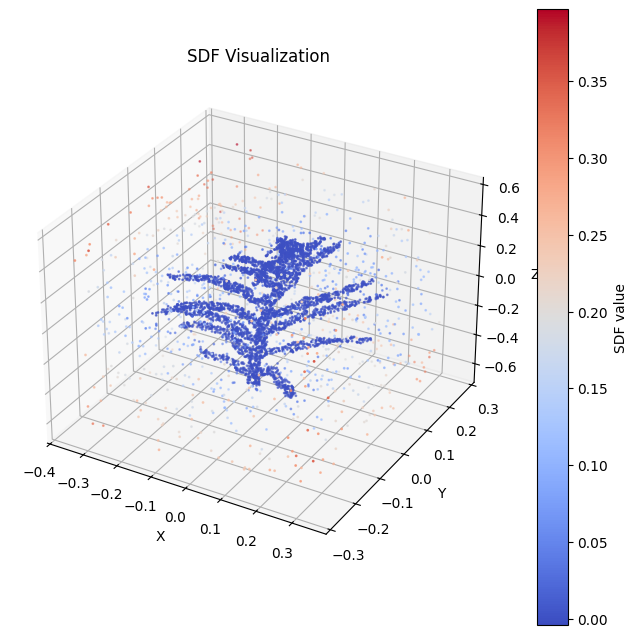

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import trimesh

# Load SDF .npz file
sdf_file = "02_dataset/maize_sdf/0503.npz"
data = np.load(sdf_file)
points = data['points']   # shape (N,3)
sdf = data['sdf']         # shape (N,)

# Normalize sdf for coloring
sdf_normalized = (sdf - sdf.min()) / (sdf.max() - sdf.min())

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(points[:,0], points[:,1], points[:,2], c=sdf, cmap='coolwarm', s=1)
fig.colorbar(p, label='SDF value')
ax.set_title("SDF Visualization")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


### Inspect the SDF dataset

In [7]:
import numpy as np

# path to one SDF file
sdf_path = "02_dataset/maize_sdf/0503.npz"

data = np.load(sdf_path)

# list all stored arrays
print("Keys in npz file:")
print(data.files)

# inspect each entry
for k in data.files:
    arr = data[k]
    print(f"\nKey: {k}")
    print(f"  shape: {arr.shape}")
    print(f"  dtype: {arr.dtype}")
    print(f"  min: {arr.min():.6f}, max: {arr.max():.6f}")


Keys in npz file:
['points', 'sdf']

Key: points
  shape: (5000, 3)
  dtype: float32
  min: -0.642002, max: 0.557709

Key: sdf
  shape: (5000,)
  dtype: float32
  min: -0.004554, max: 0.396791


# DeepSDF Implementation

## import Libraries

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch


## Split the Dataset

In [25]:
import os
import glob
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# ------------------------ Paths ------------------------
sdf_folder = "02_dataset/maize_sdf"  # folder containing your .npz files

# Get all .npz files
all_files = sorted(glob.glob(os.path.join(sdf_folder, "*.npz")))
print(f"Total objects: {len(all_files)}")

# ------------------------ Train/Val Split ------------------------
np.random.seed(42)  # for reproducibility
np.random.shuffle(all_files)

split_ratio = 0.8
split_index = int(len(all_files) * split_ratio)

train_files = all_files[:split_index]
val_files = all_files[split_index:]

print(f"Train samples: {len(train_files)}, Val samples: {len(val_files)}")
print("Train sample paths:", train_files[:5])
print("Val sample paths:", val_files[:5])


Total objects: 826
Train samples: 660, Val samples: 166
Train sample paths: ['02_dataset/maize_sdf/0649.npz', '02_dataset/maize_sdf/0175.npz', '02_dataset/maize_sdf/0068.npz', '02_dataset/maize_sdf/0169.npz', '02_dataset/maize_sdf/0276.npz']
Val sample paths: ['02_dataset/maize_sdf/0815.npz', '02_dataset/maize_sdf/0766.npz', '02_dataset/maize_sdf/0747.npz', '02_dataset/maize_sdf/0620.npz', '02_dataset/maize_sdf/0707.npz']


## Dataset Class

In [30]:
class SDFDataset(Dataset):
    def __init__(self, file_list):
        self.file_paths = file_list
        self.num_objects = len(file_list)

    def __len__(self):
        return self.num_objects

    def __getitem__(self, idx):
        data = np.load(self.file_paths[idx])
        points = data['points'].astype(np.float32)
        sdf = data['sdf'].astype(np.float32)
        shape_id = np.int64(idx)
        return torch.from_numpy(points), torch.from_numpy(sdf), shape_id

## Dataloader

In [26]:
batch_size = 8  # adjust as needed

train_dataset = SDFDataset(train_files)
val_dataset = SDFDataset(val_files)

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True, 
    num_workers=4
)

val_loader = DataLoader(
    val_dataset, 
    batch_size=batch_size, 
    shuffle=False, 
    num_workers=4
)

print(f"Train loader batches: {len(train_loader)}, Val loader batches: {len(val_loader)}")

Loaded 660 objects
Loaded 166 objects
Train loader batches: 83, Val loader batches: 21


### Verify Dataset and Dataloader Class

In [27]:
points_batch, sdf_batch, shape_ids = next(iter(train_loader))

print("Points batch shape:", points_batch.shape)  # (batch_size, num_points, 3)
print("SDF batch shape:", sdf_batch.shape)        # (batch_size, num_points)
print("Shape IDs:", shape_ids)                    # (batch_size,)
print("Sample points:", points_batch[0, :5, :])  # first 5 points of first sample
print("Sample sdf:", sdf_batch[0, :5])           # first 5 sdf values


Points batch shape: torch.Size([8, 5000, 3])
SDF batch shape: torch.Size([8, 5000])
Shape IDs: tensor([474, 624, 350, 160,  87,  54, 216, 483])
Sample points: tensor([[-0.0815,  0.0686, -0.2702],
        [ 0.1321, -0.1582, -0.1511],
        [-0.0507, -0.0905,  0.1317],
        [-0.0746,  0.1556,  0.2822],
        [-0.0185,  0.0622, -0.1323]])
Sample sdf: tensor([-0.0017, -0.0015, -0.0003, -0.0024, -0.0002])


## Model Architecture

In [31]:
import os
import glob
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
from config import *

ModuleNotFoundError: No module named 'config'

In [ ]:
class DeepSDF(nn.Module):
    def __init__(self, latent_dim=128, hidden_dim=256, num_layers=8, skip_connections=(4,), dropout=0.0):
        super().__init__()
        self.latent_dim = latent_dim
        self.skip_connections = skip_connections
        self.layers = nn.ModuleList()
        in_dim = latent_dim + 3
        for i in range(num_layers):
            out_dim = hidden_dim
            self.layers.append(nn.Linear(in_dim, out_dim))
            in_dim = out_dim
            if (i+1) in skip_connections:
                in_dim += latent_dim + 3
        self.out_layer = nn.Linear(in_dim, 1)
        self.dropout = dropout
        self.activation = nn.ReLU()
        self._init_weights()
        
    def _init_weights(self):
        for layer in self.layers:
            nn.init.normal_(layer.weight, 0.0, 0.02)
            nn.init.constant_(layer.bias, 0.0)
        nn.init.normal_(self.out_layer.weight, 0.0, 0.02)
        nn.init.constant_(self.out_layer.bias, 0.0)
        
    def forward(self, latent, points):
        B, N, _ = points.shape
        latent_exp = latent.unsqueeze(1).expand(-1, N, -1)
        x_input = torch.cat([latent_exp, points], dim=-1)
        x = x_input.view(B*N, -1)
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if (i+1) in self.skip_connections:
                x = torch.cat([x, x_input.view(B*N, -1)], dim=-1)
            x = self.activation(x)
            if self.dropout > 0:
                x = nn.functional.dropout(x, p=self.dropout, training=self.training)
        x = self.out_layer(x)
        return x.view(B, N, 1)

class LatentCodes(nn.Module):
    def __init__(self, num_shapes, latent_dim):
        super().__init__()
        self.latent_codes = nn.Embedding(num_shapes, latent_dim)
        nn.init.normal_(self.latent_codes.weight, 0.0, 0.01)
    def forward(self, shape_ids):
        if not shape_ids.dtype == torch.long:
            shape_ids = shape_ids.long()
        return self.latent_codes(shape_ids)


### Test/ Verify model

In [29]:
num_shapes = len(train_dataset)
latent_dim = 128

latent_model = LatentCodes(num_shapes, latent_dim)
decoder = DeepSDF(latent_dim=latent_dim)

# Forward pass
shape_ids = torch.tensor([0,1,2,3], dtype=torch.long)  # batch of shapes
latent = latent_model(shape_ids)                       # (B, latent_dim)
points = torch.randn(4, 5000, 3)                      # dummy points
sdf_pred = decoder(latent, points)                    # (B, N, 1)
print(sdf_pred.shape)  # should be (4, 5000, 1)


torch.Size([4, 5000, 1])


## Training 

In [15]:
# config.py
import os

class Config:
    # ------------------------
    # Dataset
    # ------------------------
    SDF_ROOT = "02_dataset/maize_sdf"
    TRAIN_LIST = "train.txt"
    VAL_LIST = "val.txt"

    # ------------------------
    # Model
    # ------------------------
    LATENT_DIM = 128
    HIDDEN_DIM = 256
    NUM_LAYERS = 8
    SKIP_CONNECTIONS = (4,)

    # ------------------------
    # Training
    # ------------------------
    BATCH_SIZE = 32
    EPOCHS = 100
    LEARNING_RATE = 5e-4
    LATENT_REG_WEIGHT = 1e-4
    SDF_CLAMP = 0.1

    # ------------------------
    # Logging / Checkpoints
    # ------------------------
    EXP_NAME = "deepsdf_maize"
    CHECKPOINT_DIR = os.path.join("checkpoints", EXP_NAME)
    MODEL_DIR = os.path.join("models", EXP_NAME)
    LOG_DIR = os.path.join("logs", EXP_NAME)

    CHECKPOINT_INTERVAL = 10

    DEVICE = "cuda"  # or "cpu"


In [16]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from datetime import datetime



In [17]:
os.makedirs(Config.CHECKPOINT_DIR, exist_ok=True)
os.makedirs(Config.MODEL_DIR, exist_ok=True)
os.makedirs(Config.LOG_DIR, exist_ok=True)

log_file = os.path.join(Config.LOG_DIR, "training.log")


In [18]:
def log(msg):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    line = f"[{timestamp}] {msg}"
    print(line)
    with open(log_file, "a") as f:
        f.write(line + "\n")


In [19]:
train_dataset = SDFDataset(os.path.join(Config.SDF_ROOT, Config.TRAIN_LIST))
train_loader = DataLoader(
    train_dataset,
    batch_size=Config.BATCH_SIZE,
    shuffle=True,
    num_workers=4,
    drop_last=True
)


Loaded 30 objects


### Initialize Model

In [ ]:
device = torch.device(Config.DEVICE)

model = DeepSDF(
    latent_dim=Config.LATENT_DIM,
    hidden_dim=Config.HIDDEN_DIM,
    num_layers=Config.NUM_LAYERS,
    skip_connections=Config.SKIP_CONNECTIONS
).to(device)

latent_codes = LatentCodes(
    num_shapes=len(train_dataset),
    latent_dim=Config.LATENT_DIM
).to(device)

optimizer = optim.Adam(
    list(model.parameters()) + list(latent_codes.parameters()),
    lr=Config.LEARNING_RATE
)

start_epoch = 1


In [21]:
checkpoint_path = os.path.join(Config.CHECKPOINT_DIR, "latest.pth")

if os.path.exists(checkpoint_path):
    log("Checkpoint found. Resuming training...")
    checkpoint = torch.load(checkpoint_path, map_location=device)

    model.load_state_dict(checkpoint["model"])
    latent_codes.load_state_dict(checkpoint["latent_codes"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    start_epoch = checkpoint["epoch"] + 1
    log(f"Resumed from epoch {start_epoch}")
else:
    log("No checkpoint found. Starting training from scratch.")


[2025-12-15 13:05:05] No checkpoint found. Starting training from scratch.


## Training Loop

In [22]:
loss_fn = nn.L1Loss()

for epoch in range(start_epoch, Config.EPOCHS + 1):
    model.train()
    latent_codes.train()

    epoch_loss = 0.0

    for points, sdf_gt, shape_ids in train_loader:
        points = points.to(device)
        sdf_gt = sdf_gt.to(device).unsqueeze(-1)
        shape_ids = shape_ids.to(device)

        optimizer.zero_grad()

        z = latent_codes(shape_ids)
        sdf_pred = model(z, points)

        sdf_gt = torch.clamp(sdf_gt, -Config.SDF_CLAMP, Config.SDF_CLAMP)
        sdf_pred = torch.clamp(sdf_pred, -Config.SDF_CLAMP, Config.SDF_CLAMP)

        sdf_loss = loss_fn(sdf_pred, sdf_gt)
        latent_reg = torch.mean(z ** 2)

        loss = sdf_loss + Config.LATENT_REG_WEIGHT * latent_reg
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)

    log(f"Epoch [{epoch}/{Config.EPOCHS}] | Loss: {epoch_loss:.6f}")

    # ---------------- Save Checkpoint ----------------
    if epoch % Config.CHECKPOINT_INTERVAL == 0:
        torch.save({
            "epoch": epoch,
            "model": model.state_dict(),
            "latent_codes": latent_codes.state_dict(),
            "optimizer": optimizer.state_dict()
        }, checkpoint_path)

        log(f"Checkpoint saved at epoch {epoch}")


ZeroDivisionError: float division by zero

### Save model

In [ ]:
final_model_path = os.path.join(Config.MODEL_DIR, "deepsdf_final.pth")

torch.save({
    "model": model.state_dict(),
    "latent_codes": latent_codes.state_dict()
}, final_model_path)

log("Training completed.")
log(f"Final model saved at {final_model_path}")


# DeepSDF Implementation - 2

## Import Libraries

In [9]:
import os
import glob
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

## Dataset Class

In [10]:
class MaizeSDFDataset(Dataset):
    def __init__(self, sdf_root):
        """
        sdf_root: folder containing *.npz files
        """
        self.sdf_files = sorted(glob.glob(os.path.join(sdf_root, "*.npz")))
        assert len(self.sdf_files) > 0, "No .npz files found"

    def __len__(self):
        return len(self.sdf_files)

    def __getitem__(self, idx):
        data = np.load(self.sdf_files[idx])

        points = data["points"].astype(np.float32)   # (N, 3)
        sdf = data["sdf"].astype(np.float32)          # (N,)

        return {
            "points": torch.from_numpy(points),   # (N, 3)
            "sdf": torch.from_numpy(sdf),          # (N,)
            "idx": idx                              # instance ID
        }


In [14]:
sdf_root = "02_dataset/maize_sdf"

dataset = MaizeSDFDataset(sdf_root)

print("Number of maize instances:", len(dataset))

sample = dataset[0]
print("Keys:", sample.keys())
print("Points shape:", sample["points"].shape)
print("SDF shape:", sample["sdf"].shape)
print("Instance index:", sample["idx"])
print("SDF min/max:", sample["sdf"].min().item(), sample["sdf"].max().item())


Number of maize instances: 826
Keys: dict_keys(['points', 'sdf', 'idx'])
Points shape: torch.Size([5000, 3])
SDF shape: torch.Size([5000])
Instance index: 0
SDF min/max: -0.004585930611938238 0.3610668480396271


### Collate Function

In [15]:
def deep_sdf_collate_fn(batch, samples_per_instance=1024):
    all_points = []
    all_sdf = []
    all_idx = []

    for item in batch:
        points = item["points"]
        sdf = item["sdf"]
        idx = item["idx"]

        N = points.shape[0]
        choice = torch.randperm(N)[:samples_per_instance]

        all_points.append(points[choice])
        all_sdf.append(sdf[choice])
        all_idx.append(torch.full((samples_per_instance,), idx, dtype=torch.long))

    return {
        "points": torch.cat(all_points, dim=0),  # (B*K, 3)
        "sdf": torch.cat(all_sdf, dim=0),         # (B*K,)
        "idx": torch.cat(all_idx, dim=0)          # (B*K,)
    }


## Dataloader

In [12]:
batch_size = 4                  # number of maize instances per batch
samples_per_instance = 1024     # SDF samples per instance

dataloader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4,
    collate_fn=lambda b: deep_sdf_collate_fn(b, samples_per_instance)
)

In [16]:
batch = next(iter(dataloader))

print("Batch keys:", batch.keys())
print("Points shape:", batch["points"].shape)
print("SDF shape:", batch["sdf"].shape)
print("IDX shape:", batch["idx"].shape)

print("Unique instance indices in batch:", torch.unique(batch["idx"]))


Batch keys: dict_keys(['points', 'sdf', 'idx'])
Points shape: torch.Size([4096, 3])
SDF shape: torch.Size([4096])
IDX shape: torch.Size([4096])
Unique instance indices in batch: tensor([ 44,  46,  92, 280])


## Latent Code table

In [17]:
class LatentCodeTable(torch.nn.Module):
    def __init__(self, num_instances, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        self.latent_codes = torch.nn.Embedding(num_instances, latent_dim)

        # DeepSDF-style initialization
        torch.nn.init.normal_(
            self.latent_codes.weight,
            mean=0.0,
            std=0.01
        )

    def forward(self, idx):
        """
        idx: (B*K,) instance indices
        returns: (B*K, latent_dim)
        """
        return self.latent_codes(idx)


### Verify latent table

In [18]:
num_instances = len(dataset)
latent_dim = 128

latent_table = LatentCodeTable(num_instances, latent_dim)

# test with a batch of indices
test_idx = batch["idx"][:8]  # reuse batch from dataloader
z = latent_table(test_idx)

print("IDX shape:", test_idx.shape)
print("Latent shape:", z.shape)
print("Latent mean/std:", z.mean().item(), z.std().item())


IDX shape: torch.Size([8])
Latent shape: torch.Size([8, 128])
Latent mean/std: 0.00010207612649537623 0.010198964737355709


## Model Architecture

In [19]:
class DeepSDFDecoder(torch.nn.Module):
    def __init__(self, latent_dim):
        super().__init__()

        input_dim = latent_dim + 3
        hidden_dim = 512

        self.fc1 = torch.nn.Linear(input_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = torch.nn.Linear(hidden_dim, hidden_dim)

        # Skip connection layer (re-inject input)
        self.fc5 = torch.nn.Linear(hidden_dim + input_dim, hidden_dim)

        self.fc6 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.fc7 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.fc8 = torch.nn.Linear(hidden_dim, 1)

        self.relu = torch.nn.ReLU()

    def forward(self, x, z):
        """
        x: (N, 3)
        z: (N, latent_dim)
        """
        input = torch.cat([x, z], dim=1)

        h = self.relu(self.fc1(input))
        h = self.relu(self.fc2(h))
        h = self.relu(self.fc3(h))
        h = self.relu(self.fc4(h))

        # Skip connection
        h = torch.cat([h, input], dim=1)
        h = self.relu(self.fc5(h))

        h = self.relu(self.fc6(h))
        h = self.relu(self.fc7(h))

        sdf = self.fc8(h)
        return sdf.squeeze(1)


### Verify Model architeture

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

latent_table = latent_table.to(device)
decoder = DeepSDFDecoder(latent_dim).to(device)

points = batch["points"].to(device)
idx = batch["idx"].to(device)

z = latent_table(idx)
sdf_pred = decoder(points, z)

print("Points shape:", points.shape)
print("Latent shape:", z.shape)
print("Predicted SDF shape:", sdf_pred.shape)


Points shape: torch.Size([4096, 3])
Latent shape: torch.Size([4096, 128])
Predicted SDF shape: torch.Size([4096])


## Training 

### Training Config

In [56]:
import time
from pathlib import Path

# ------------------ CONFIG ------------------
num_epochs = 2000
latent_reg_weight = 1e-4
learning_rate = 5e-4

checkpoint_dir = Path("checkpoints_deepsdf")
log_dir = Path("logs/logs_deepsdf")
final_model_dir = Path("models/deepsdf_maize")

checkpoint_dir.mkdir(parents=True, exist_ok=True)
log_dir.mkdir(parents=True, exist_ok=True)
final_model_dir.mkdir(parents=True, exist_ok=True)


log_file = log_dir / "training_log.txt"


### Loss Function 

In [57]:
sdf_loss_fn = torch.nn.L1Loss()   # DeepSDF prefers L1

### Optimizer

In [52]:
optimizer = torch.optim.Adam(
    list(decoder.parameters()) + list(latent_table.parameters()),
    lr=learning_rate
)


### Checkpoint Utils

In [58]:
def save_checkpoint(epoch):
    ckpt_path = checkpoint_dir / f"epoch_{epoch:04d}.pth"
    torch.save({
        "epoch": epoch,
        "decoder": decoder.state_dict(),
        "latent_table": latent_table.state_dict(),
        "optimizer": optimizer.state_dict()
    }, ckpt_path)


def load_latest_checkpoint():
    checkpoints = sorted(checkpoint_dir.glob("epoch_*.pth"))
    if not checkpoints:
        return 0

    latest_ckpt = checkpoints[-1]
    data = torch.load(latest_ckpt, map_location=device)

    decoder.load_state_dict(data["decoder"])
    latent_table.load_state_dict(data["latent_table"])
    optimizer.load_state_dict(data["optimizer"])

    print(f"Resumed from {latest_ckpt}")
    return data["epoch"]


In [59]:
start_epoch = load_latest_checkpoint()

# logging mode
log_mode = "a" if start_epoch > 0 else "w"

with open(log_file, log_mode) as f:
    if start_epoch == 0:
        f.write("epoch,total_loss,sdf_loss,latent_reg_loss,time_sec\n")


Resumed from checkpoints_deepsdf/epoch_0500.pth


### Training Loop

In [55]:
decoder.train()
latent_table.train()

for epoch in range(start_epoch + 1, num_epochs + 1):
    epoch_sdf_loss = 0.0
    epoch_latent_loss = 0.0
    start_time = time.time()

    for batch in dataloader:
        points = batch["points"].to(device)
        sdf_gt = batch["sdf"].to(device)
        idx = batch["idx"].to(device)

        # lookup latent codes
        z = latent_table(idx)

        # forward
        sdf_pred = decoder(points, z)

        # losses
        sdf_loss = sdf_loss_fn(sdf_pred, sdf_gt)
        latent_reg_loss = torch.mean(z ** 2)
        loss = sdf_loss + latent_reg_weight * latent_reg_loss

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_sdf_loss += sdf_loss.item()
        epoch_latent_loss += latent_reg_loss.item()

    # averages
    epoch_sdf_loss /= len(dataloader)
    epoch_latent_loss /= len(dataloader)
    epoch_total_loss = epoch_sdf_loss + latent_reg_weight * epoch_latent_loss
    elapsed = time.time() - start_time

    # logging
    with open(log_file, "a") as f:
        f.write(
            f"{epoch},{epoch_total_loss:.6f},"
            f"{epoch_sdf_loss:.6f},"
            f"{epoch_latent_loss:.6f},"
            f"{elapsed:.2f}\n"
        )

    print(
        f"[Epoch {epoch:03d}] "
        f"Total: {epoch_total_loss:.6f} | "
        f"SDF: {epoch_sdf_loss:.6f} | "
        f"Latent: {epoch_latent_loss:.6f}"
    )

    # checkpoint
    if epoch % 10 == 0:
        save_checkpoint(epoch)


[Epoch 101] Total: 0.004178 | SDF: 0.004178 | Latent: 0.002642
[Epoch 102] Total: 0.004188 | SDF: 0.004188 | Latent: 0.002666
[Epoch 103] Total: 0.004129 | SDF: 0.004128 | Latent: 0.002686
[Epoch 104] Total: 0.004176 | SDF: 0.004175 | Latent: 0.002710
[Epoch 105] Total: 0.004135 | SDF: 0.004135 | Latent: 0.002731
[Epoch 106] Total: 0.004039 | SDF: 0.004038 | Latent: 0.002749
[Epoch 107] Total: 0.004055 | SDF: 0.004055 | Latent: 0.002778
[Epoch 108] Total: 0.004055 | SDF: 0.004055 | Latent: 0.002799
[Epoch 109] Total: 0.004098 | SDF: 0.004098 | Latent: 0.002818
[Epoch 110] Total: 0.004053 | SDF: 0.004053 | Latent: 0.002843
[Epoch 111] Total: 0.004016 | SDF: 0.004016 | Latent: 0.002861
[Epoch 112] Total: 0.004118 | SDF: 0.004118 | Latent: 0.002883
[Epoch 113] Total: 0.004115 | SDF: 0.004115 | Latent: 0.002905
[Epoch 114] Total: 0.004087 | SDF: 0.004086 | Latent: 0.002928
[Epoch 115] Total: 0.004055 | SDF: 0.004055 | Latent: 0.002949
[Epoch 116] Total: 0.004008 | SDF: 0.004007 | Latent: 0

### Save model

In [35]:
torch.save(
    {
        "decoder": decoder.state_dict(),
        "latent_table": latent_table.state_dict()
    },
    final_model_dir / "deepsdf_final_model_100epoch.pth"
)

print("Final DeepSDF model saved.")

Final DeepSDF model saved.


## Visualize the loss

In [36]:
import pandas as pd

log_path = "logs/logs_deepsdf/training_log.txt"

df = pd.read_csv(log_path)
print(df.head())
print(df.tail())


   epoch  total_loss  sdf_loss  latent_reg_loss  time_sec
0      1    0.024909  0.024909         0.000099      1.52
1      2    0.018767  0.018767         0.000123      1.31
2      3    0.016714  0.016714         0.000165      1.31
3      4    0.014404  0.014404         0.000218      1.33
4      5    0.013467  0.013467         0.000269      1.41
    epoch  total_loss  sdf_loss  latent_reg_loss  time_sec
95     96    0.004298  0.004298         0.002531      1.44
96     97    0.004234  0.004234         0.002558      1.53
97     98    0.004196  0.004195         0.002577      1.52
98     99    0.004227  0.004227         0.002602      1.46
99    100    0.004211  0.004211         0.002620      1.49


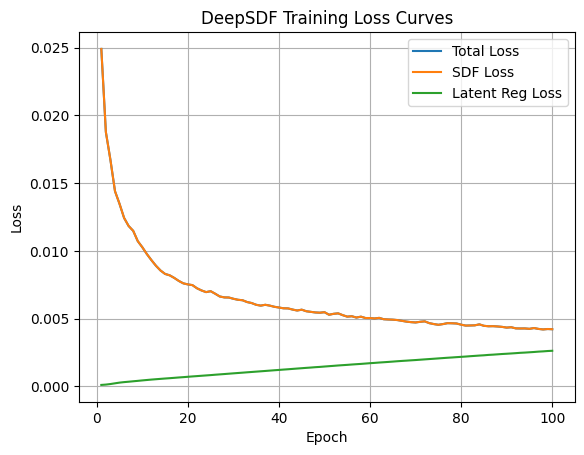

In [37]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["epoch"], df["total_loss"], label="Total Loss")
plt.plot(df["epoch"], df["sdf_loss"], label="SDF Loss")
plt.plot(df["epoch"], df["latent_reg_loss"], label="Latent Reg Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DeepSDF Training Loss Curves")
plt.legend()
plt.grid(True)
plt.show()


## Inference for unseen Maize Dataset 

In [38]:
ckpt = torch.load("models/deepsdf_maize/deepsdf_final_model_100epoch.pth", map_location=device)

decoder.load_state_dict(ckpt["decoder"])
decoder.eval()

latent_dim = 128


In [40]:
import numpy as np

unseen_sdf_path = "02_dataset/maize_sdf/0009.npz"

data = np.load(unseen_sdf_path)
points = torch.from_numpy(data["points"]).float().to(device)   # (N, 3)
sdf_gt = torch.from_numpy(data["sdf"]).float().to(device)       # (N,)

print(points.shape, sdf_gt.shape)


torch.Size([5000, 3]) torch.Size([5000])


In [41]:
z = torch.zeros((1, latent_dim), device=device, requires_grad=True)

latent_lr = 1e-3
latent_reg_weight = 1e-4
num_iters = 800

optimizer_z = torch.optim.Adam([z], lr=latent_lr)
loss_fn = torch.nn.L1Loss()


In [42]:
decoder.eval()

for it in range(1, num_iters + 1):
    idx = torch.zeros(points.shape[0], dtype=torch.long, device=device)
    z_expanded = z.expand(points.shape[0], -1)

    sdf_pred = decoder(points, z_expanded)

    sdf_loss = loss_fn(sdf_pred, sdf_gt)
    latent_reg = torch.mean(z ** 2)
    loss = sdf_loss + latent_reg_weight * latent_reg

    optimizer_z.zero_grad()
    loss.backward()
    optimizer_z.step()

    if it % 100 == 0:
        print(
            f"[Iter {it:04d}] "
            f"SDF Loss: {sdf_loss.item():.6f} | "
            f"Latent Reg: {latent_reg.item():.6f}"
        )


[Iter 0100] SDF Loss: 0.004285 | Latent Reg: 0.001461
[Iter 0200] SDF Loss: 0.003667 | Latent Reg: 0.001769
[Iter 0300] SDF Loss: 0.003505 | Latent Reg: 0.001980
[Iter 0400] SDF Loss: 0.003384 | Latent Reg: 0.002186
[Iter 0500] SDF Loss: 0.003262 | Latent Reg: 0.002403
[Iter 0600] SDF Loss: 0.003193 | Latent Reg: 0.002590
[Iter 0700] SDF Loss: 0.003140 | Latent Reg: 0.002756
[Iter 0800] SDF Loss: 0.003095 | Latent Reg: 0.002905


In [43]:
torch.save(z.detach().cpu(), "inferred_latent_maize.pt")
print("Latent code saved.")


Latent code saved.


## Visualize the output

In [44]:
import torch

z = torch.load("inferred_latent_maize.pt").to(device)  # (1, latent_dim)
decoder.eval()


DeepSDFDecoder(
  (fc1): Linear(in_features=131, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (fc5): Linear(in_features=643, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=512, bias=True)
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (fc8): Linear(in_features=512, out_features=1, bias=True)
  (relu): ReLU()
)

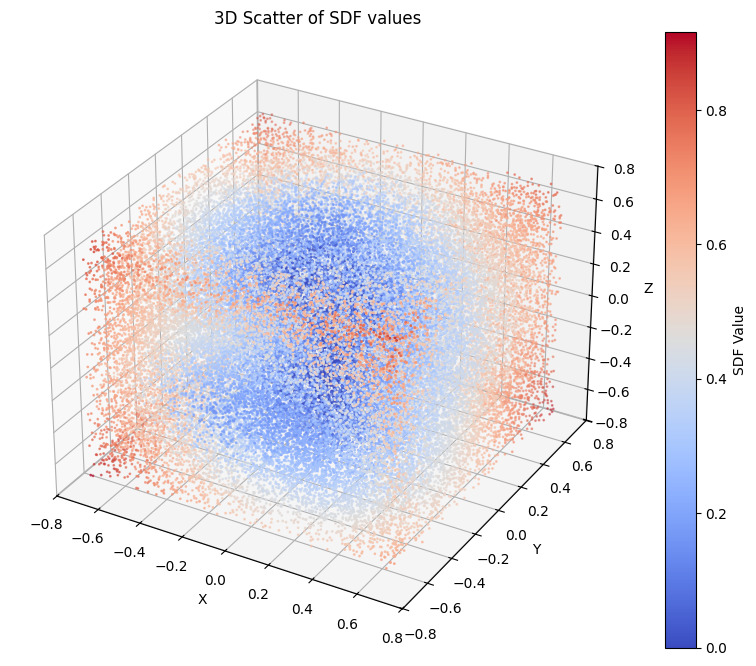

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots

# ---------------- 1️⃣ Grid points already defined ----------------
# grid_points_tensor = (N, 3) from previous step
# z = latent vector
# decoder = trained decoder

# ---------------- 2️⃣ Evaluate SDF in chunks ----------------
chunk_size = 50000
sdf_values_list = []

for i in range(0, grid_points_tensor.shape[0], chunk_size):
    pts_chunk = grid_points_tensor[i:i+chunk_size]
    z_chunk = z.expand(pts_chunk.shape[0], -1)
    with torch.no_grad():
        sdf_chunk = decoder(pts_chunk, z_chunk)
    sdf_values_list.append(sdf_chunk.cpu().numpy())

sdf_values = np.concatenate(sdf_values_list)  # (N,)

# Convert grid points to numpy
grid_points_np = grid_points_tensor.cpu().numpy()

# ---------------- 3️⃣ Plot ----------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use a subset for faster plotting if needed
subset = np.random.choice(len(grid_points_np), size=50000, replace=False)
x, y, z_ = grid_points_np[subset, 0], grid_points_np[subset, 1], grid_points_np[subset, 2]
colors = sdf_values[subset]

sc = ax.scatter(x, y, z_, c=colors, cmap='coolwarm', s=1)
plt.colorbar(sc, label="SDF Value")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Scatter of SDF values")
plt.show()


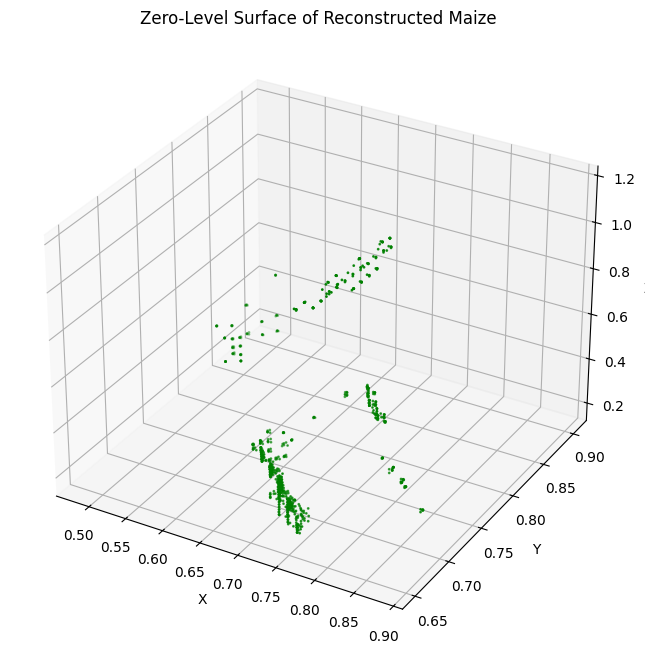

In [49]:
import numpy as np
import torch
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------------- 1️⃣ Load latent and decoder ----------------
z = torch.load("inferred_latent_maize.pt").to(device)
decoder.eval()

# ---------------- 2️⃣ Create 3D grid ----------------
x_min, x_max = -0.7, 0.7
y_min, y_max = -0.7, 0.7
z_min, z_max = -0.7, 0.7
grid_resolution = 128  # Increase if GPU allows

xs = np.linspace(x_min, x_max, grid_resolution)
ys = np.linspace(y_min, y_max, grid_resolution)
zs = np.linspace(z_min, z_max, grid_resolution)

X, Y, Z = np.meshgrid(xs, ys, zs)
grid_points = np.stack([X, Y, Z], axis=-1).reshape(-1, 3)
grid_points_tensor = torch.from_numpy(grid_points).float().to(device)

# ---------------- 3️⃣ Evaluate SDF in chunks ----------------
chunk_size = 50000
sdf_values_list = []

for i in range(0, grid_points_tensor.shape[0], chunk_size):
    pts_chunk = grid_points_tensor[i:i+chunk_size]
    z_chunk = z.expand(pts_chunk.shape[0], -1)
    with torch.no_grad():
        sdf_chunk = decoder(pts_chunk, z_chunk)
    sdf_values_list.append(sdf_chunk.cpu().numpy())

sdf_values = np.concatenate(sdf_values_list)  # (N,)
sdf_values_grid = sdf_values.reshape(grid_resolution, grid_resolution, grid_resolution)

# ---------------- 4️⃣ Extract zero-level surface (Marching Cubes) ----------------
verts, faces, normals, _ = measure.marching_cubes(
    sdf_values_grid, level=0.0, spacing=(xs[1]-xs[0], ys[1]-ys[0], zs[1]-zs[0])
)

# ---------------- 5️⃣ Plot the vertices only ----------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(verts[:, 0], verts[:, 1], verts[:, 2],
           c='green', s=1)  # small green points for surface

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Zero-Level Surface of Reconstructed Maize")
plt.show()
